# Data science Lab 2 

## Unsupervised anomaly detection in content delivery network log analytics

### Shahid Gulzar Padder 
###### Neptun id: XPXSKK

### Importing important libraries

In [1]:
import pandas as pd
import numpy as np
import random as rnd

# For visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Reading Dataset and EDA

In [2]:
dataset = pd.read_csv('CDN anomaly detection dataset .csv')# No delimiter like ","or ";"

In [3]:
dataset

Channel ID                contenttype  protocol  contentlength  \
0              206                 video/mp4  HTTP/1.1   13392.936510   
1              502                 text/html  HTTP/1.1       2.634921   
2              403  text/html; charset=utf-8  HTTP/1.0       2.619048   
3              412                 text/html  HTTP/1.1      23.888889   
4              412                 text/html  HTTP/1.1      23.888889   
...            ...                       ...       ...            ...   
30360          403  text/html; charset=utf-8  HTTP/1.0       2.619048   
30361          502                 text/html  HTTP/1.1       2.634921   
30362          206                 video/mp4  HTTP/1.1   64225.714290   
30363          405  text/html; charset=utf-8  HTTP/1.1       3.047619   
30364          304           application/zip  HTTP/1.1       0.000000   

       timefirstbyte  timetoserv      maxage  osfamily       sid  \
0           0.000150    0.000689  31536000.0       0.0  153806.0   
1           0.020632    0.020684         NaN       1.0  165279.0   
2           0.000052    0.000120         NaN       NaN  432213.0   
3           0.014797    0.014842         NaN       NaN  207847.0   
4           0.014794    0.014847         NaN       0.0  234088.0   
...              ...         ...         ...       ...       ...   
30360       0.000056    0.000139         NaN       NaN  197138.0   
30361       8.387374    8.387429         NaN       1.0  234350.0   
30362       0.000143    2.302989  31536000.0       0.0   93673.0   
30363       0.000023    0.000081         NaN       NaN       NaN   
30364       0.000199    0.000258       300.0       3.0   26296.0   

                           cachecontrol  ...  fragment      path  \
0        Cache-Control:max-age=31536000  ...     False   3931298   
1                        Cache-Control:  ...     False        92   
2                        Cache-Control:  ...     False   3896814   
3                        Cache-Control:  ...     False  21936373   
4                        Cache-Control:  ...     False  25178360   
...                                 ...  ...       ...       ...   
30360                    Cache-Control:  ...     False   3896667   
30361                    Cache-Control:  ...     False       413   
30362    Cache-Control:max-age=31536000  ...     False   3667434   
30363                    Cache-Control:  ...     False       935   
30364  Cache-Control:public,max-age=300  ...     False        42   

                     @timestamp  Unnamed: 16  geo-location Host ID  \
0      2088-05-14T23:07:25.000Z          NaN         773.0     NaN   
1      2088-05-16T02:43:49.000Z          NaN           1.0     1.0   
2      2088-05-18T19:05:36.000Z          NaN           0.0     NaN   
3      2088-05-15T20:25:47.000Z          NaN           0.0    60.0   
4      2088-05-16T04:08:07.000Z          NaN        1633.0    60.0   
...                         ...          ...           ...     ...   
30360  2088-05-15T19:06:50.000Z          NaN           0.0     NaN   
30361  2088-05-16T02:15:10.000Z          NaN           1.0    48.0   
30362  2088-05-14T13:49:20.000Z          NaN           6.0     NaN   
30363  2088-05-16T03:36:48.000Z          NaN           0.0     NaN   
30364  2088-05-13T18:54:51.000Z          NaN           0.0     NaN   

       devicemodel  devicebrand  User ID  method  
0              NaN          NaN      4.0     GET  
1              0.0          0.0      1.0     GET  
2              NaN          NaN     14.0     GET  
3              NaN          NaN      7.0     GET  
4              NaN          NaN      7.0     GET  
...            ...          ...      ...     ...  
30360          NaN          NaN     14.0     GET  
30361          0.0          0.0      1.0     GET  
30362          NaN          NaN      4.0     GET  
30363          NaN          NaN     53.0    CFYZ  
30364          1.0          1.0      0.0     GET  

[30365 rows x 23 columns]

In [4]:
print(dataset.columns.values) # Feature names

['Channel ID ' 'contenttype' 'protocol' 'contentlength' 'timefirstbyte'
 'timetoserv' 'maxage' 'osfamily' 'sid' 'cachecontrol' 'uamajor'
 'uafamily' 'devicefamily' 'fragment' 'path' '@timestamp' 'Unnamed: 16'
 'geo-location' 'Host ID' 'devicemodel' 'devicebrand' 'User ID' 'method']


In [5]:
dataset.shape

(30365, 23)

In [6]:
dataset.isnull().values.any()

True

In [7]:
dataset.isnull().sum(axis = 0)

Channel ID           0
contenttype       1710
protocol             0
contentlength        0
timefirstbyte      375
timetoserv           0
maxage           19265
osfamily          6722
sid               3161
cachecontrol         0
uamajor          20137
uafamily          6722
devicefamily      6722
fragment             0
path                 0
@timestamp           0
Unnamed: 16      30365
geo-location       404
Host ID          20171
devicemodel      19359
devicebrand      19359
User ID            475
method              34
dtype: int64

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30365 entries, 0 to 30364
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Channel ID     30365 non-null  int64  
 1   contenttype    28655 non-null  object 
 2   protocol       30365 non-null  object 
 3   contentlength  30365 non-null  float64
 4   timefirstbyte  29990 non-null  float64
 5   timetoserv     30365 non-null  float64
 6   maxage         11100 non-null  float64
 7   osfamily       23643 non-null  float64
 8   sid            27204 non-null  float64
 9   cachecontrol   30365 non-null  object 
 10  uamajor        10228 non-null  float64
 11  uafamily       23643 non-null  float64
 12  devicefamily   23643 non-null  float64
 13  fragment       30365 non-null  bool   
 14  path           30365 non-null  int64  
 15  @timestamp     30365 non-null  object 
 16  Unnamed: 16    0 non-null      float64
 17  geo-location   29961 non-null  float64
 18  Host I

In [9]:
dataset=dataset.drop(columns=['Unnamed: 16'])

<AxesSubplot:>

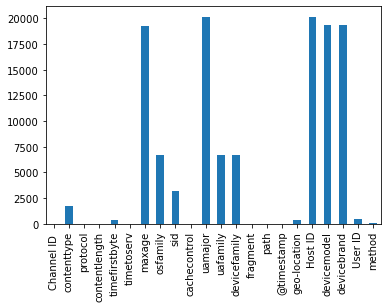

In [10]:
dataset.isnull().sum().plot.bar(x="Features", y="Missing Values")

In [11]:
dataset.nunique()

Channel ID          16
contenttype         16
protocol             2
contentlength     3425
timefirstbyte    11729
timetoserv       12902
maxage              11
osfamily            10
sid              17862
cachecontrol        15
uamajor             63
uafamily            37
devicefamily       150
fragment             1
path              9156
@timestamp       19478
geo-location      1882
Host ID            138
devicemodel        148
devicebrand         15
User ID             37
method              20
dtype: int64

In [12]:
sns.set(rc={'figure.figsize':(10,6)})

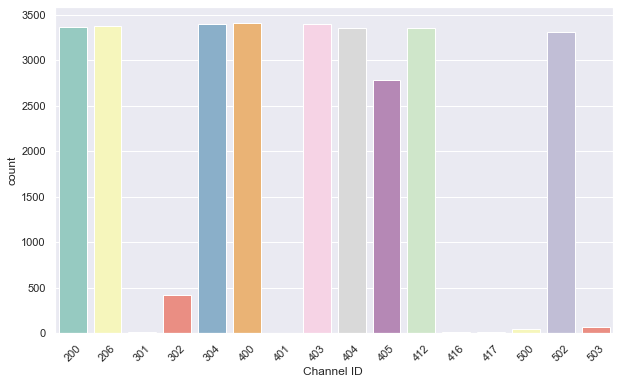

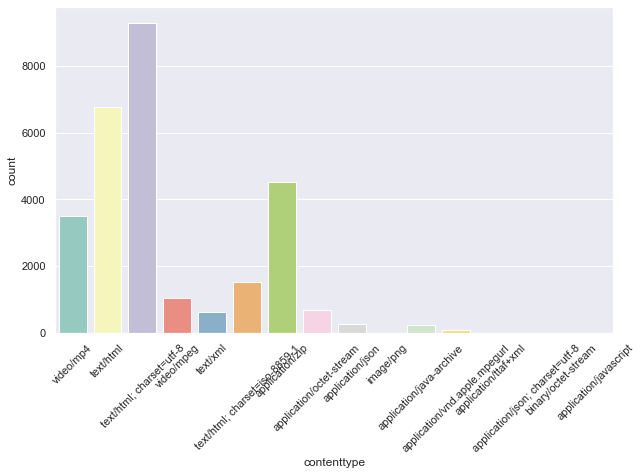

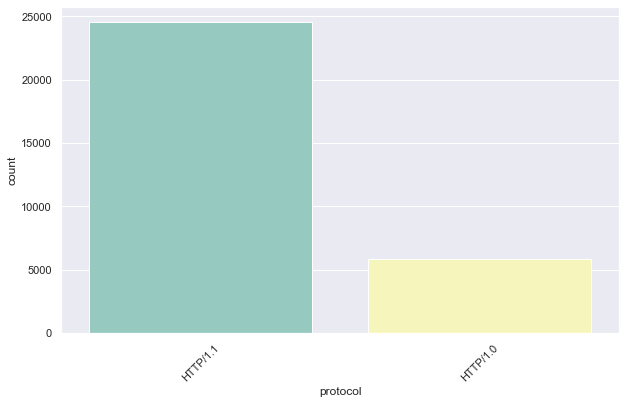

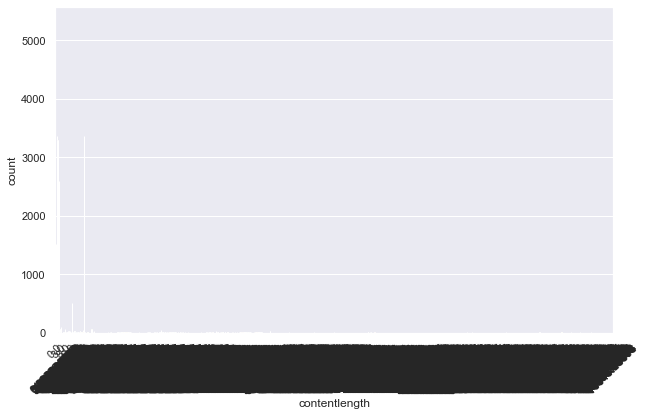

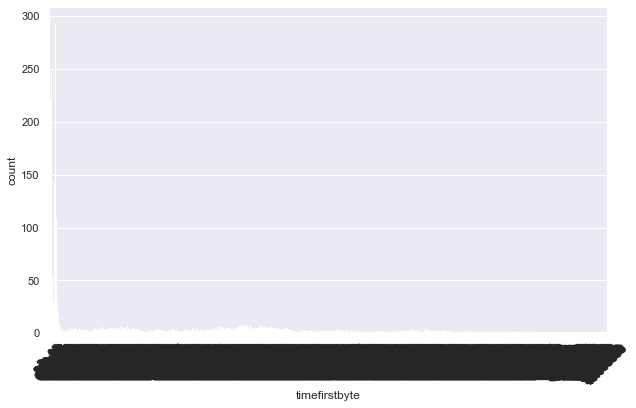

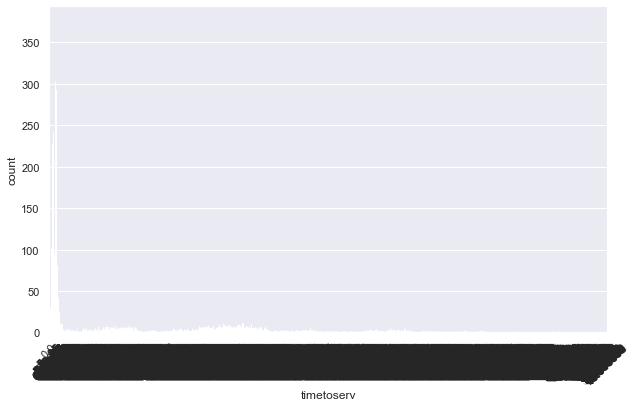

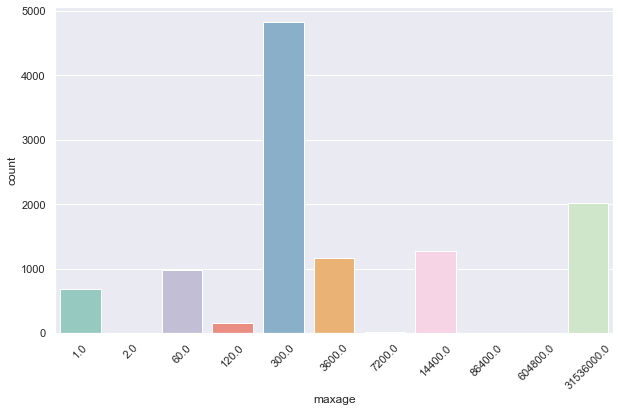

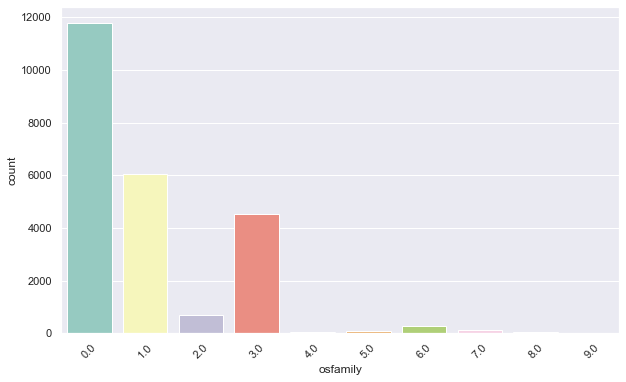

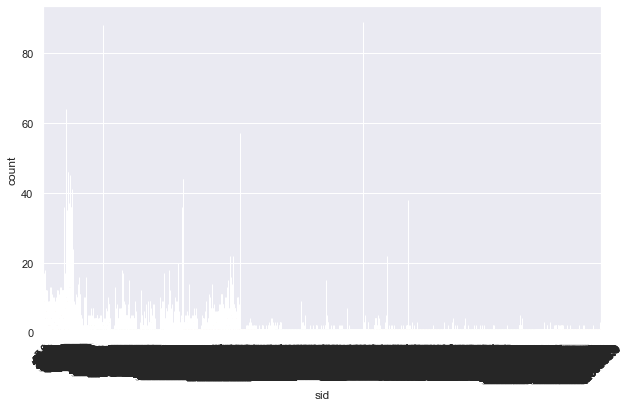

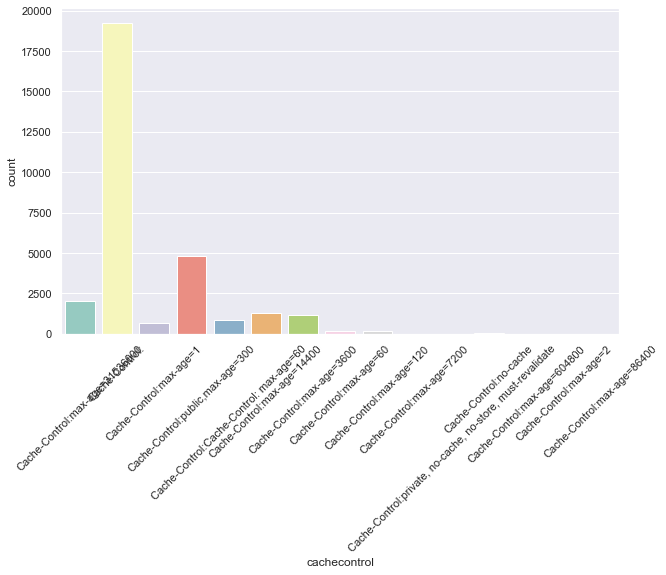

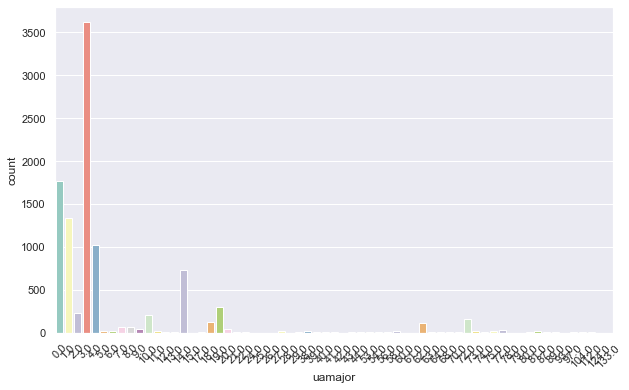

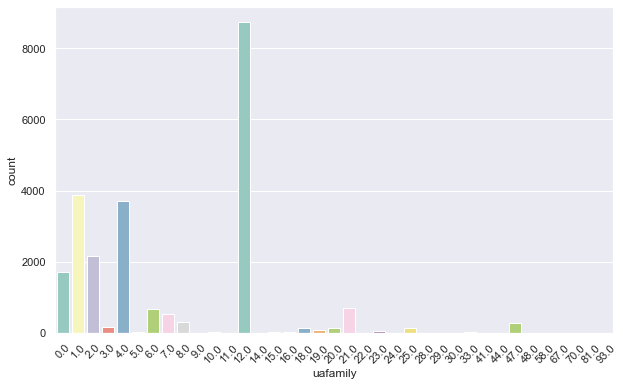

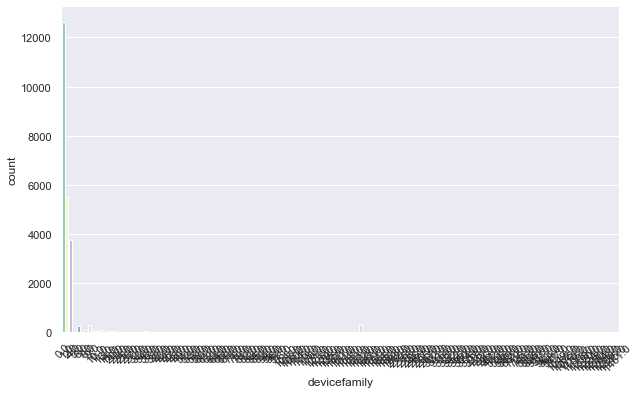

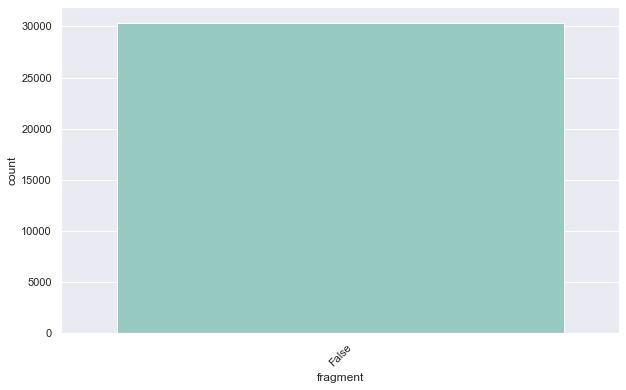

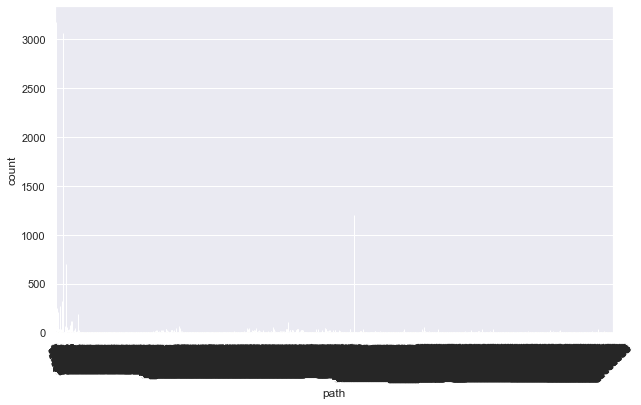

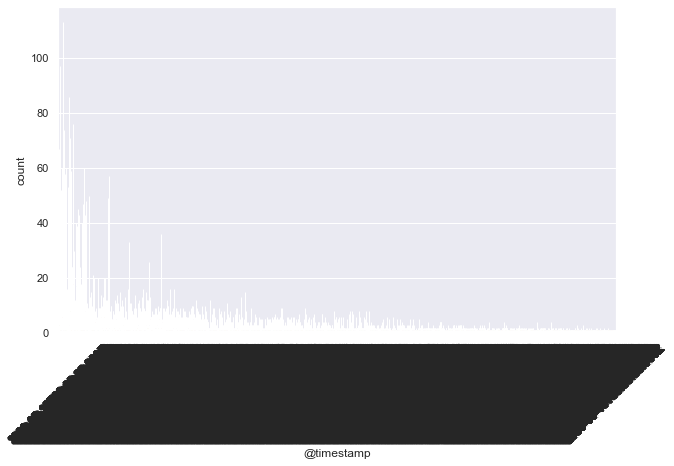

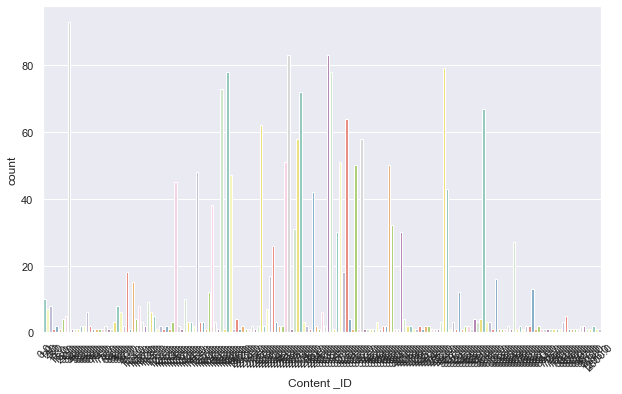

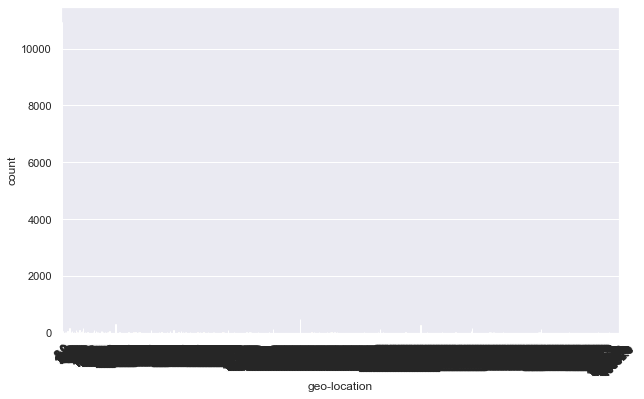

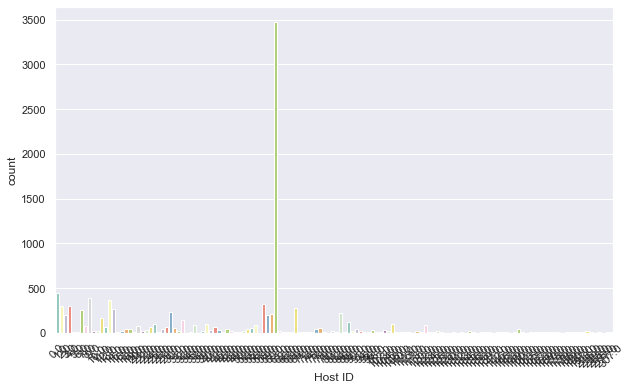

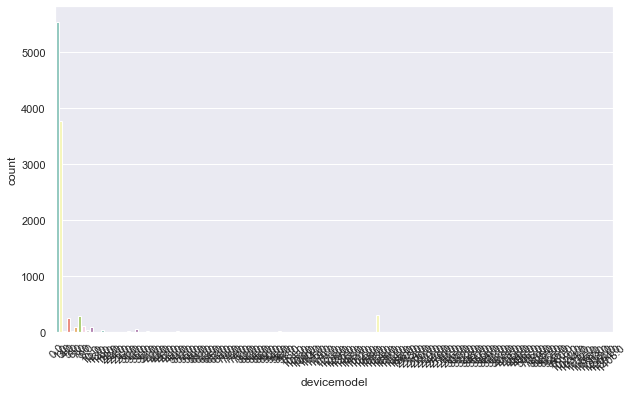

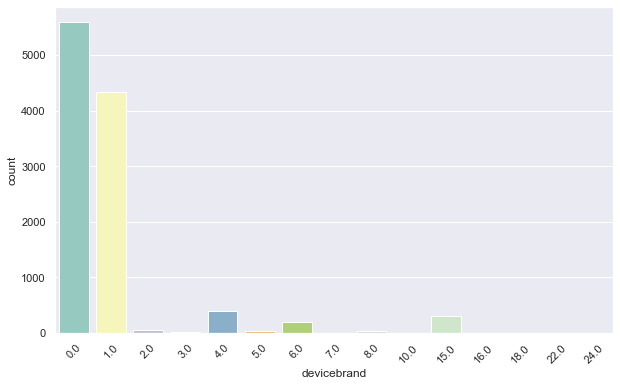

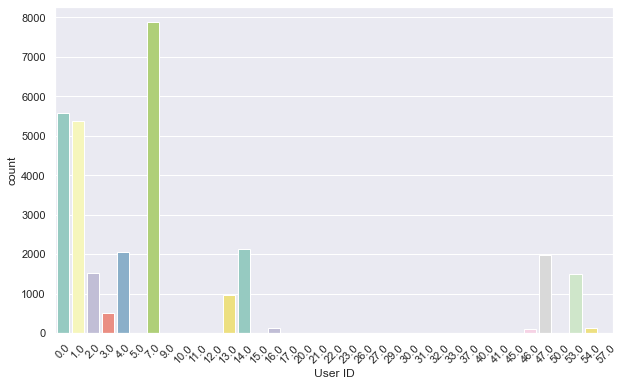

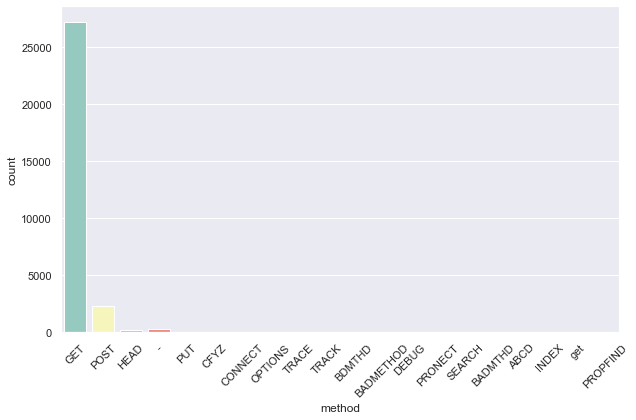

In [19]:
#Analysing the metioned features in descrption file
attributes = ['Channel ID ', 'contenttype', 'protocol', 'contentlength', 'timefirstbyte',
 'timetoserv', 'maxage', 'osfamily', 'sid', 'cachecontrol', 'uamajor',
 'uafamily', 'devicefamily', 'fragment', 'path', '@timestamp', 'Content _ID ',
 'geo-location', 'Host ID', 'devicemodel', 'devicebrand', 'User ID', 'method']
for f in attributes:
    sns.countplot(x = f, data = dataset, palette = 'Set3')
    plt.xticks(rotation=45)
    plt.savefig('f')
    plt.show()

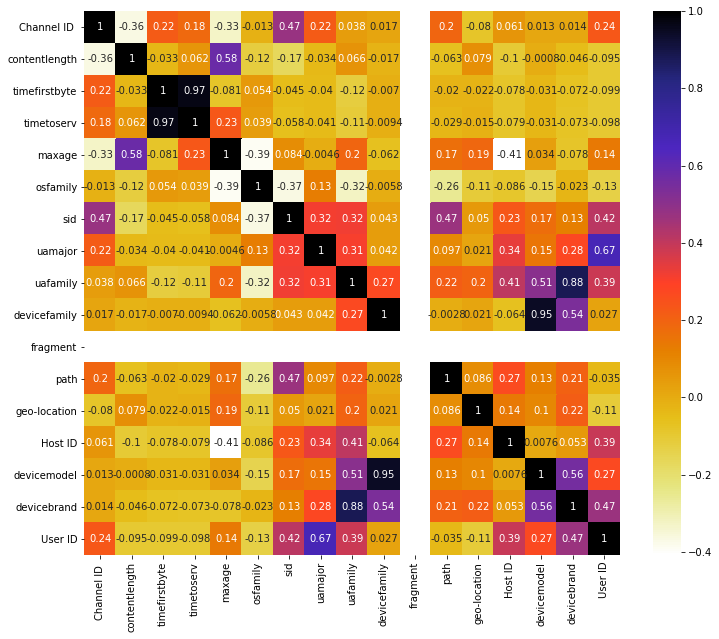

In [12]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = dataset.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [13]:
updated_df=dataset.drop(columns=['fragment','@timestamp'])
#'fragment' has only one value i.e; False 

In [14]:
updated_df

Channel ID                contenttype  protocol  contentlength  \
0              206                 video/mp4  HTTP/1.1   13392.936510   
1              502                 text/html  HTTP/1.1       2.634921   
2              403  text/html; charset=utf-8  HTTP/1.0       2.619048   
3              412                 text/html  HTTP/1.1      23.888889   
4              412                 text/html  HTTP/1.1      23.888889   
...            ...                       ...       ...            ...   
30360          403  text/html; charset=utf-8  HTTP/1.0       2.619048   
30361          502                 text/html  HTTP/1.1       2.634921   
30362          206                 video/mp4  HTTP/1.1   64225.714290   
30363          405  text/html; charset=utf-8  HTTP/1.1       3.047619   
30364          304           application/zip  HTTP/1.1       0.000000   

       timefirstbyte  timetoserv      maxage  osfamily       sid  \
0           0.000150    0.000689  31536000.0       0.0  153806.0   
1           0.020632    0.020684         NaN       1.0  165279.0   
2           0.000052    0.000120         NaN       NaN  432213.0   
3           0.014797    0.014842         NaN       NaN  207847.0   
4           0.014794    0.014847         NaN       0.0  234088.0   
...              ...         ...         ...       ...       ...   
30360       0.000056    0.000139         NaN       NaN  197138.0   
30361       8.387374    8.387429         NaN       1.0  234350.0   
30362       0.000143    2.302989  31536000.0       0.0   93673.0   
30363       0.000023    0.000081         NaN       NaN       NaN   
30364       0.000199    0.000258       300.0       3.0   26296.0   

                           cachecontrol  uamajor  uafamily  devicefamily  \
0        Cache-Control:max-age=31536000      NaN      12.0           0.0   
1                        Cache-Control:      1.0       2.0           1.0   
2                        Cache-Control:      NaN       NaN           NaN   
3                        Cache-Control:      NaN       NaN           NaN   
4                        Cache-Control:      NaN      12.0           0.0   
...                                 ...      ...       ...           ...   
30360                    Cache-Control:      NaN       NaN           NaN   
30361                    Cache-Control:      4.0       2.0           1.0   
30362    Cache-Control:max-age=31536000      NaN      12.0           0.0   
30363                    Cache-Control:      NaN       NaN           NaN   
30364  Cache-Control:public,max-age=300      3.0       4.0           2.0   

           path  geo-location  Host ID  devicemodel  devicebrand  User ID  \
0       3931298         773.0      NaN          NaN          NaN      4.0   
1            92           1.0      1.0          0.0          0.0      1.0   
2       3896814           0.0      NaN          NaN          NaN     14.0   
3      21936373           0.0     60.0          NaN          NaN      7.0   
4      25178360        1633.0     60.0          NaN          NaN      7.0   
...         ...           ...      ...          ...          ...      ...   
30360   3896667           0.0      NaN          NaN          NaN     14.0   
30361       413           1.0     48.0          0.0          0.0      1.0   
30362   3667434           6.0      NaN          NaN          NaN      4.0   
30363       935           0.0      NaN          NaN          NaN     53.0   
30364        42           0.0      NaN          1.0          1.0      0.0   

      method  
0        GET  
1        GET  
2        GET  
3        GET  
4        GET  
...      ...  
30360    GET  
30361    GET  
30362    GET  
30363   CFYZ  
30364    GET  

[30365 rows x 20 columns]

### Filling null values

In [15]:
updated_df['timefirstbyte']=updated_df['timefirstbyte'].fillna(updated_df['timefirstbyte'].mean())

In [16]:
updated_df['osfamily']=updated_df['osfamily'].fillna(updated_df['osfamily'].mean())

In [17]:
updated_df['sid']=updated_df['sid'].fillna(updated_df['sid'].mean())

In [18]:
updated_df['contenttype']=updated_df['contenttype'].fillna(updated_df['contenttype'].mode()[0])

In [19]:
updated_df['method']=updated_df['method'].fillna(updated_df['method'].mode()[0])

In [20]:
updated_df['uamajor']=updated_df['uamajor'].fillna(updated_df['uamajor'].mean())

In [21]:
updated_df['uafamily']=updated_df['uafamily'].fillna(updated_df['uafamily'].mean())

In [22]:
updated_df['devicefamily']=updated_df['devicefamily'].fillna(updated_df['devicefamily'].mean())

In [23]:
updated_df['geo-location']=updated_df['geo-location'].fillna(updated_df['geo-location'].mean())

In [24]:
updated_df['Host ID']=updated_df['Host ID'].fillna(updated_df['Host ID'].mean())

In [25]:
updated_df['geo-location']=updated_df['geo-location'].fillna(updated_df['geo-location'].mean())

In [26]:
updated_df['Host ID']=updated_df['Host ID'].fillna(updated_df['Host ID'].mean())

In [27]:
updated_df['devicemodel']=updated_df['devicemodel'].fillna(updated_df['devicemodel'].mean())

In [28]:
updated_df['devicebrand']=updated_df['devicebrand'].fillna(updated_df['devicebrand'].mean())

In [29]:
updated_df['maxage']=updated_df['maxage'].fillna(updated_df['maxage'].mean())

In [30]:
updated_df['User ID']=updated_df['User ID'].fillna(updated_df['User ID'].mean())

In [31]:
updated_df['maxage']=updated_df['maxage'].fillna(updated_df['maxage'].mean())

In [32]:
updated_df.isnull().sum(axis = 0)

Channel ID       0
contenttype      0
protocol         0
contentlength    0
timefirstbyte    0
timetoserv       0
maxage           0
osfamily         0
sid              0
cachecontrol     0
uamajor          0
uafamily         0
devicefamily     0
path             0
geo-location     0
Host ID          0
devicemodel      0
devicebrand      0
User ID          0
method           0
dtype: int64

### Histogram plot in order to select only frequent data to ease after encoding effects

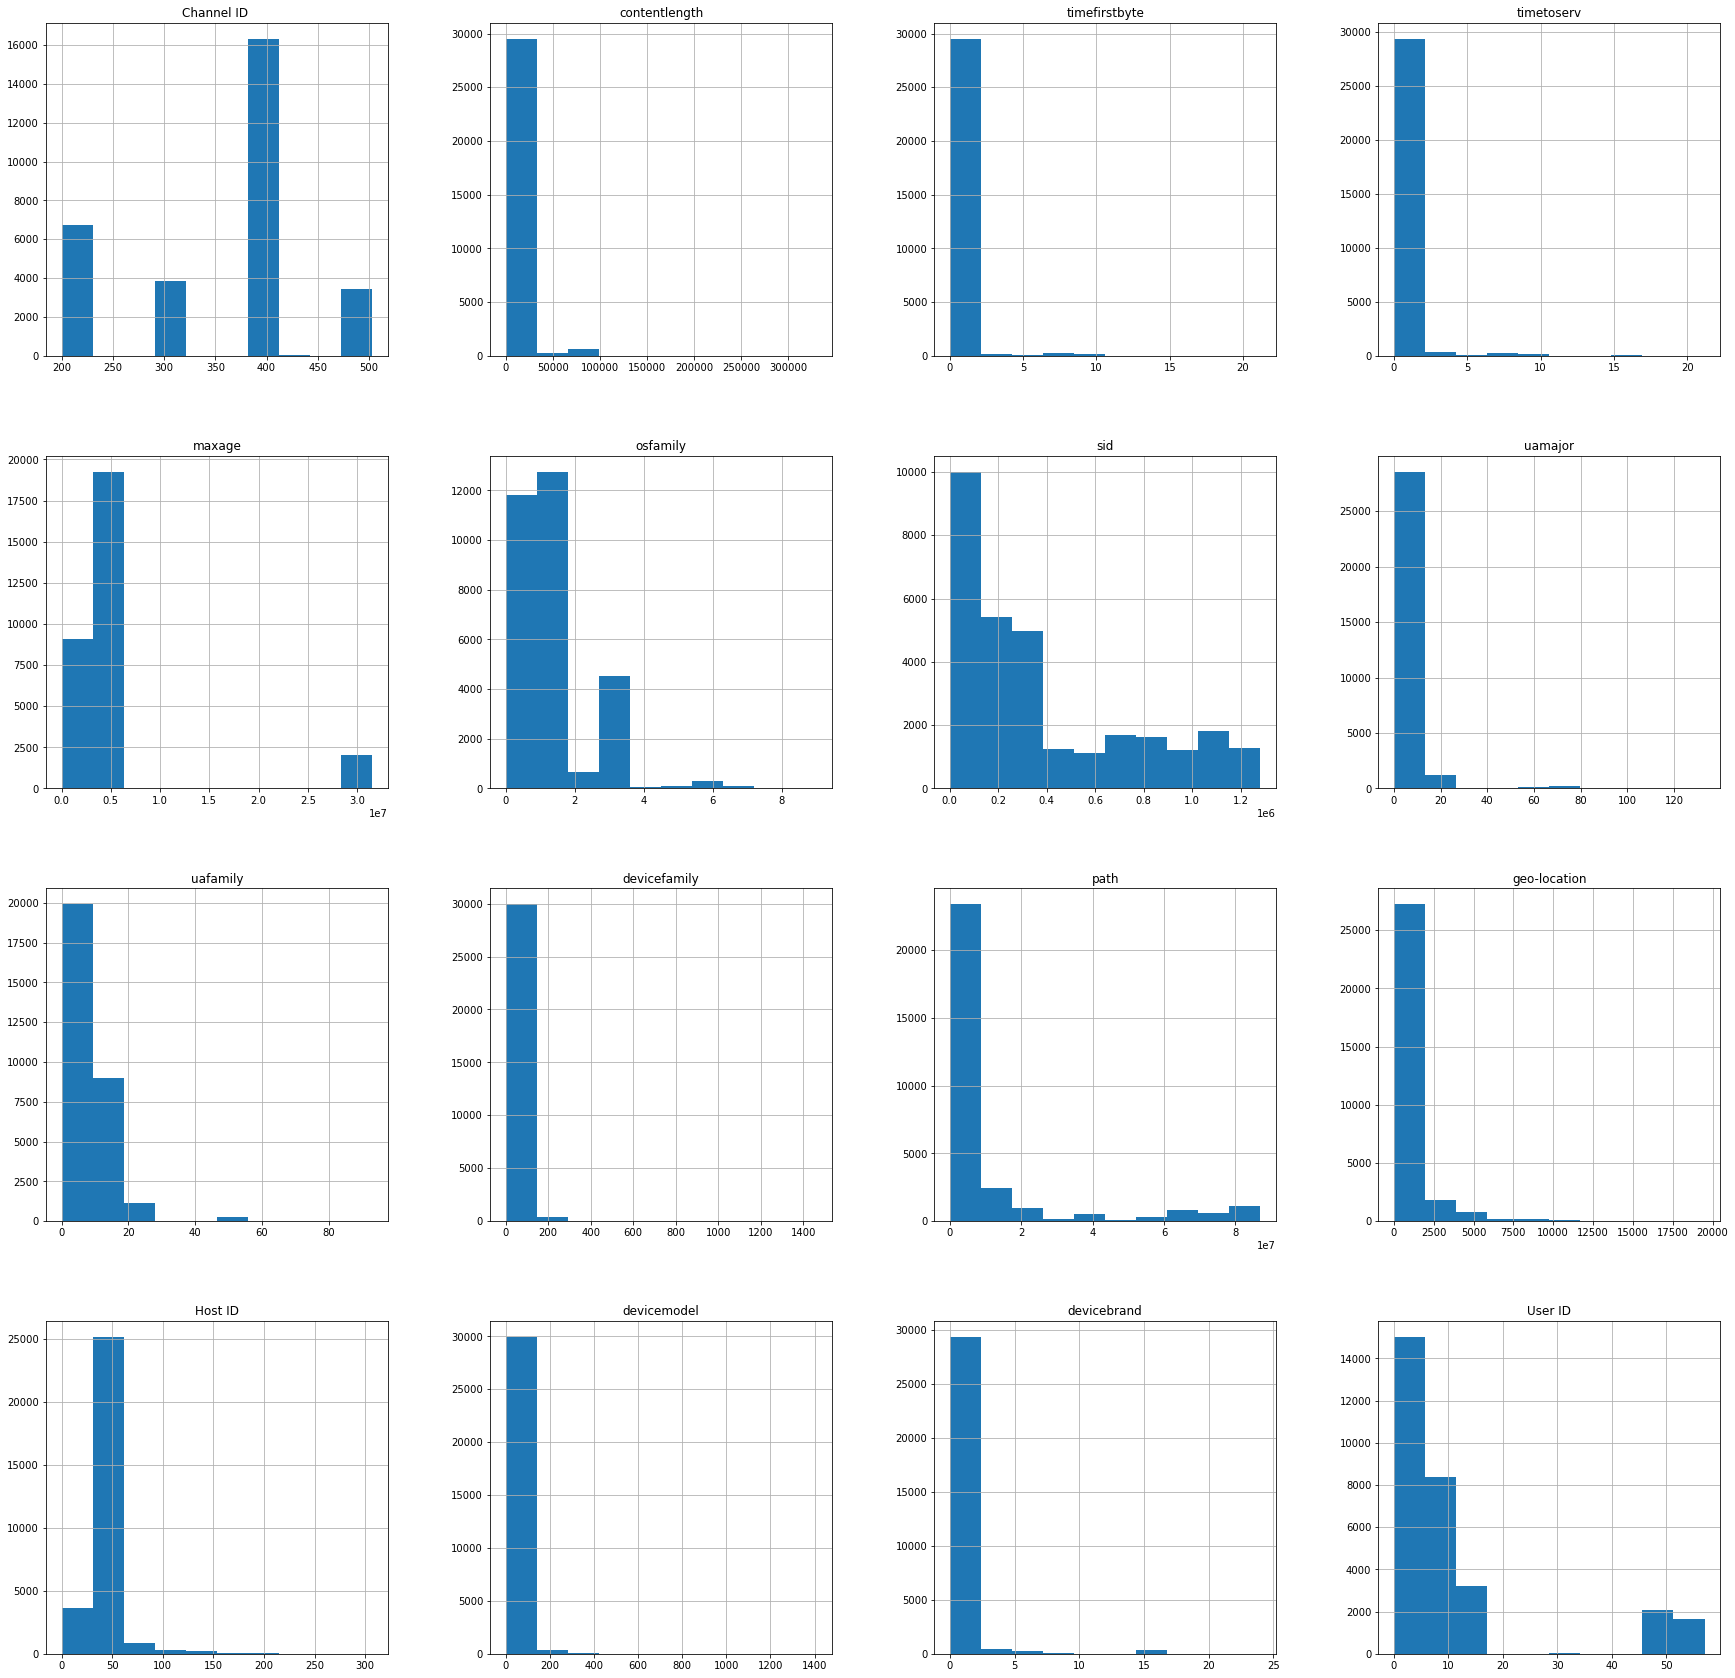

In [33]:
updated_df.hist(figsize = (30,30))
plt.show()

In [34]:
#Label encoding the ordinal values and using dummies for categorical nominal features
from sklearn.preprocessing import LabelEncoder
leb = LabelEncoder()
updated_df2= updated_df[['contenttype','protocol','cachecontrol','method']].apply(leb.fit_transform)
updated_df2

contenttype  protocol  cachecontrol  method
0               14         1             6       8
1               10         1             0       8
2               12         0             0       8
3               10         1             0       8
4               10         1             0       8
...            ...       ...           ...     ...
30360           12         0             0       8
30361           10         1             0       8
30362           14         1             6       8
30363           12         1             0       5
30364            7         1            14       8

[30365 rows x 4 columns]

In [35]:
updated_df3=updated_df.drop(columns=['contenttype','protocol','cachecontrol','method'])
updated_df3

Channel ID   contentlength  timefirstbyte  timetoserv        maxage  \
0              206   13392.936510       0.000150    0.000689  3.153600e+07   
1              502       2.634921       0.020632    0.020684  5.735584e+06   
2              403       2.619048       0.000052    0.000120  5.735584e+06   
3              412      23.888889       0.014797    0.014842  5.735584e+06   
4              412      23.888889       0.014794    0.014847  5.735584e+06   
...            ...            ...            ...         ...           ...   
30360          403       2.619048       0.000056    0.000139  5.735584e+06   
30361          502       2.634921       8.387374    8.387429  5.735584e+06   
30362          206   64225.714290       0.000143    2.302989  3.153600e+07   
30363          405       3.047619       0.000023    0.000081  5.735584e+06   
30364          304       0.000000       0.000199    0.000258  3.000000e+02   

       osfamily            sid   uamajor   uafamily  devicefamily      path  \
0      0.000000  153806.000000  7.607646  12.000000       0.00000   3931298   
1      1.000000  165279.000000  1.000000   2.000000       1.00000        92   
2      1.041704  432213.000000  7.607646   7.716068       6.14186   3896814   
3      1.041704  207847.000000  7.607646   7.716068       6.14186  21936373   
4      0.000000  234088.000000  7.607646  12.000000       0.00000  25178360   
...         ...            ...       ...        ...           ...       ...   
30360  1.041704  197138.000000  7.607646   7.716068       6.14186   3896667   
30361  1.000000  234350.000000  4.000000   2.000000       1.00000       413   
30362  0.000000   93673.000000  7.607646  12.000000       0.00000   3667434   
30363  1.041704  377176.750257  7.607646   7.716068       6.14186       935   
30364  3.000000   26296.000000  3.000000   4.000000       2.00000        42   

       geo-location    Host ID  devicemodel  devicebrand  User ID  
0             773.0  47.065333    11.480829     1.153462      4.0  
1               1.0   1.000000     0.000000     0.000000      1.0  
2               0.0  47.065333    11.480829     1.153462     14.0  
3               0.0  60.000000    11.480829     1.153462      7.0  
4            1633.0  60.000000    11.480829     1.153462      7.0  
...             ...        ...          ...          ...      ...  
30360           0.0  47.065333    11.480829     1.153462     14.0  
30361           1.0  48.000000     0.000000     0.000000      1.0  
30362           6.0  47.065333    11.480829     1.153462      4.0  
30363           0.0  47.065333    11.480829     1.153462     53.0  
30364           0.0  47.065333     1.000000     1.000000      0.0  

[30365 rows x 16 columns]

In [37]:
updated_df3.isnull().values.any()

False

In [38]:
updated_df4=pd.concat([updated_df3,updated_df2], axis='columns')
updated_df4

Channel ID   contentlength  timefirstbyte  timetoserv        maxage  \
0              206   13392.936510       0.000150    0.000689  3.153600e+07   
1              502       2.634921       0.020632    0.020684  5.735584e+06   
2              403       2.619048       0.000052    0.000120  5.735584e+06   
3              412      23.888889       0.014797    0.014842  5.735584e+06   
4              412      23.888889       0.014794    0.014847  5.735584e+06   
...            ...            ...            ...         ...           ...   
30360          403       2.619048       0.000056    0.000139  5.735584e+06   
30361          502       2.634921       8.387374    8.387429  5.735584e+06   
30362          206   64225.714290       0.000143    2.302989  3.153600e+07   
30363          405       3.047619       0.000023    0.000081  5.735584e+06   
30364          304       0.000000       0.000199    0.000258  3.000000e+02   

       osfamily            sid   uamajor   uafamily  devicefamily      path  \
0      0.000000  153806.000000  7.607646  12.000000       0.00000   3931298   
1      1.000000  165279.000000  1.000000   2.000000       1.00000        92   
2      1.041704  432213.000000  7.607646   7.716068       6.14186   3896814   
3      1.041704  207847.000000  7.607646   7.716068       6.14186  21936373   
4      0.000000  234088.000000  7.607646  12.000000       0.00000  25178360   
...         ...            ...       ...        ...           ...       ...   
30360  1.041704  197138.000000  7.607646   7.716068       6.14186   3896667   
30361  1.000000  234350.000000  4.000000   2.000000       1.00000       413   
30362  0.000000   93673.000000  7.607646  12.000000       0.00000   3667434   
30363  1.041704  377176.750257  7.607646   7.716068       6.14186       935   
30364  3.000000   26296.000000  3.000000   4.000000       2.00000        42   

       geo-location    Host ID  devicemodel  devicebrand  User ID  \
0             773.0  47.065333    11.480829     1.153462      4.0   
1               1.0   1.000000     0.000000     0.000000      1.0   
2               0.0  47.065333    11.480829     1.153462     14.0   
3               0.0  60.000000    11.480829     1.153462      7.0   
4            1633.0  60.000000    11.480829     1.153462      7.0   
...             ...        ...          ...          ...      ...   
30360           0.0  47.065333    11.480829     1.153462     14.0   
30361           1.0  48.000000     0.000000     0.000000      1.0   
30362           6.0  47.065333    11.480829     1.153462      4.0   
30363           0.0  47.065333    11.480829     1.153462     53.0   
30364           0.0  47.065333     1.000000     1.000000      0.0   

       contenttype  protocol  cachecontrol  method  
0               14         1             6       8  
1               10         1             0       8  
2               12         0             0       8  
3               10         1             0       8  
4               10         1             0       8  
...            ...       ...           ...     ...  
30360           12         0             0       8  
30361           10         1             0       8  
30362           14         1             6       8  
30363           12         1             0       5  
30364            7         1            14       8  

[30365 rows x 20 columns]

In [39]:
updated_df4.describe()

Channel ID   contentlength  timefirstbyte    timetoserv        maxage  \
count  30365.000000   30365.000000   30365.000000  30365.000000  3.036500e+04   
mean     358.166837    2677.706689       0.252041      0.281526  5.735584e+06   
std       96.144059   11705.963700       1.395376      1.431828  7.353239e+06   
min      200.000000       0.000000       0.000016      0.000000  1.000000e+00   
25%      304.000000       0.285714       0.000130      0.000194  3.600000e+03   
50%      403.000000       2.714286       0.007622      0.008018  5.735584e+06   
75%      405.000000      23.888889       0.016195      0.020042  5.735584e+06   
max      503.000000  330028.746000      21.182559     21.182610  3.153600e+07   

           osfamily           sid       uamajor      uafamily  devicefamily  \
count  30365.000000  3.036500e+04  30365.000000  30365.000000   30365.00000   
mean       1.041704  3.771768e+05      7.607646      7.716068       6.14186   
std        1.242351  3.741024e+05      8.931605      6.530773      41.76275   
min        0.000000  2.000000e+00      0.000000      0.000000       0.00000   
25%        0.000000  2.650700e+04      4.000000      2.000000       0.00000   
50%        1.000000  2.352020e+05      7.607646      7.716068       1.00000   
75%        1.041704  6.409180e+05      7.607646     12.000000       6.14186   
max        9.000000  1.281434e+06    133.000000     93.000000    1461.00000   

               path  geo-location       Host ID   devicemodel   devicebrand  \
count  3.036500e+04  30365.000000  30365.000000  30365.000000  30365.000000   
mean   1.062683e+07    599.943727     47.065333     11.480829      1.153462   
std    2.162234e+07   1498.837227     20.689400     36.925310      1.632823   
min    0.000000e+00      0.000000      0.000000      0.000000      0.000000   
25%    9.350000e+02      0.000000     47.065333      1.000000      1.000000   
50%    9.617880e+05      1.000000     47.065333     11.480829      1.153462   
75%    4.927398e+06    379.000000     47.065333     11.480829      1.153462   
max    8.699116e+07  19500.000000    307.000000   1408.000000     24.000000   

            User ID   contenttype      protocol  cachecontrol        method  
count  30365.000000  30365.000000  30365.000000  30365.000000  30365.000000  
mean      10.155135     10.720007      0.807706      3.206685      8.247884  
std       15.401240      2.741675      0.394109      5.150824      1.512356  
min        0.000000      0.000000      0.000000      0.000000      0.000000  
25%        1.000000     10.000000      1.000000      0.000000      8.000000  
50%        7.000000     12.000000      1.000000      0.000000      8.000000  
75%        7.000000     12.000000      1.000000      6.000000      8.000000  
max       57.000000     15.000000      1.000000     14.000000     19.000000

In [40]:
data_chosen=updated_df4

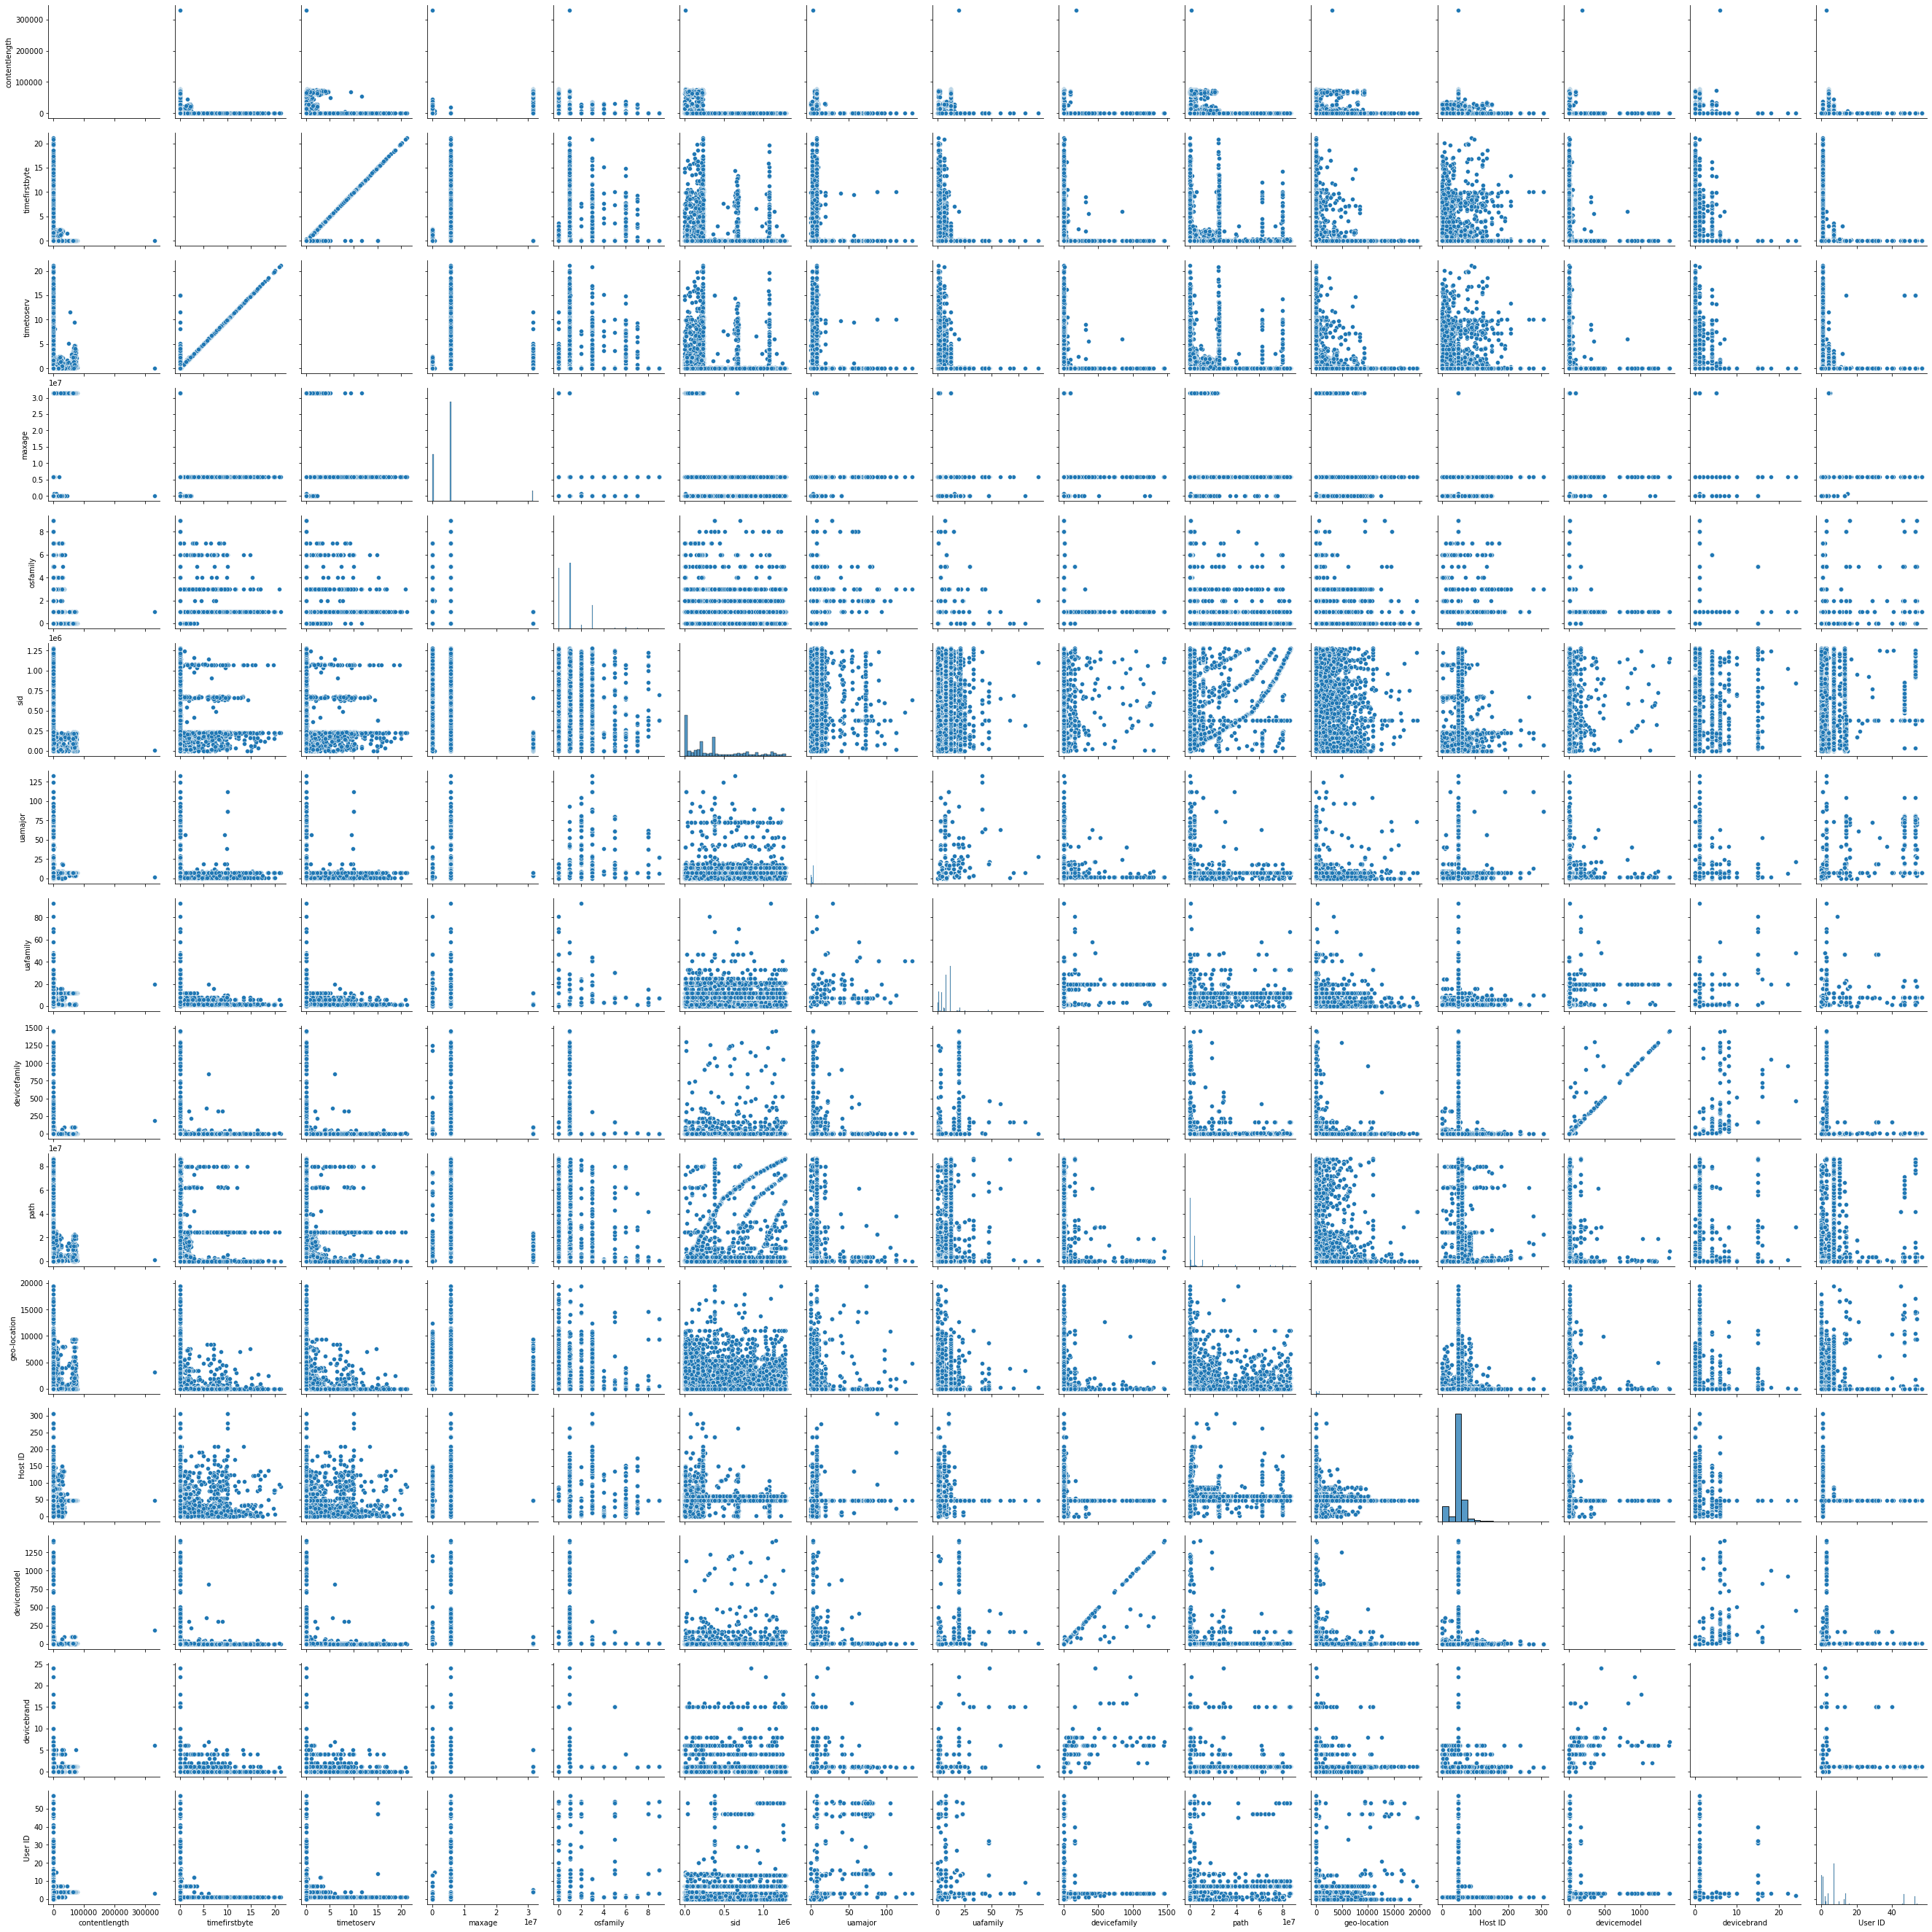

In [41]:
tempdf = updated_df4[['contentlength','timefirstbyte','timetoserv','maxage','osfamily','sid','uamajor','uafamily','devicefamily','path','geo-location','Host ID','devicemodel','devicebrand','User ID']]

sns.pairplot(tempdf, palette='bright')

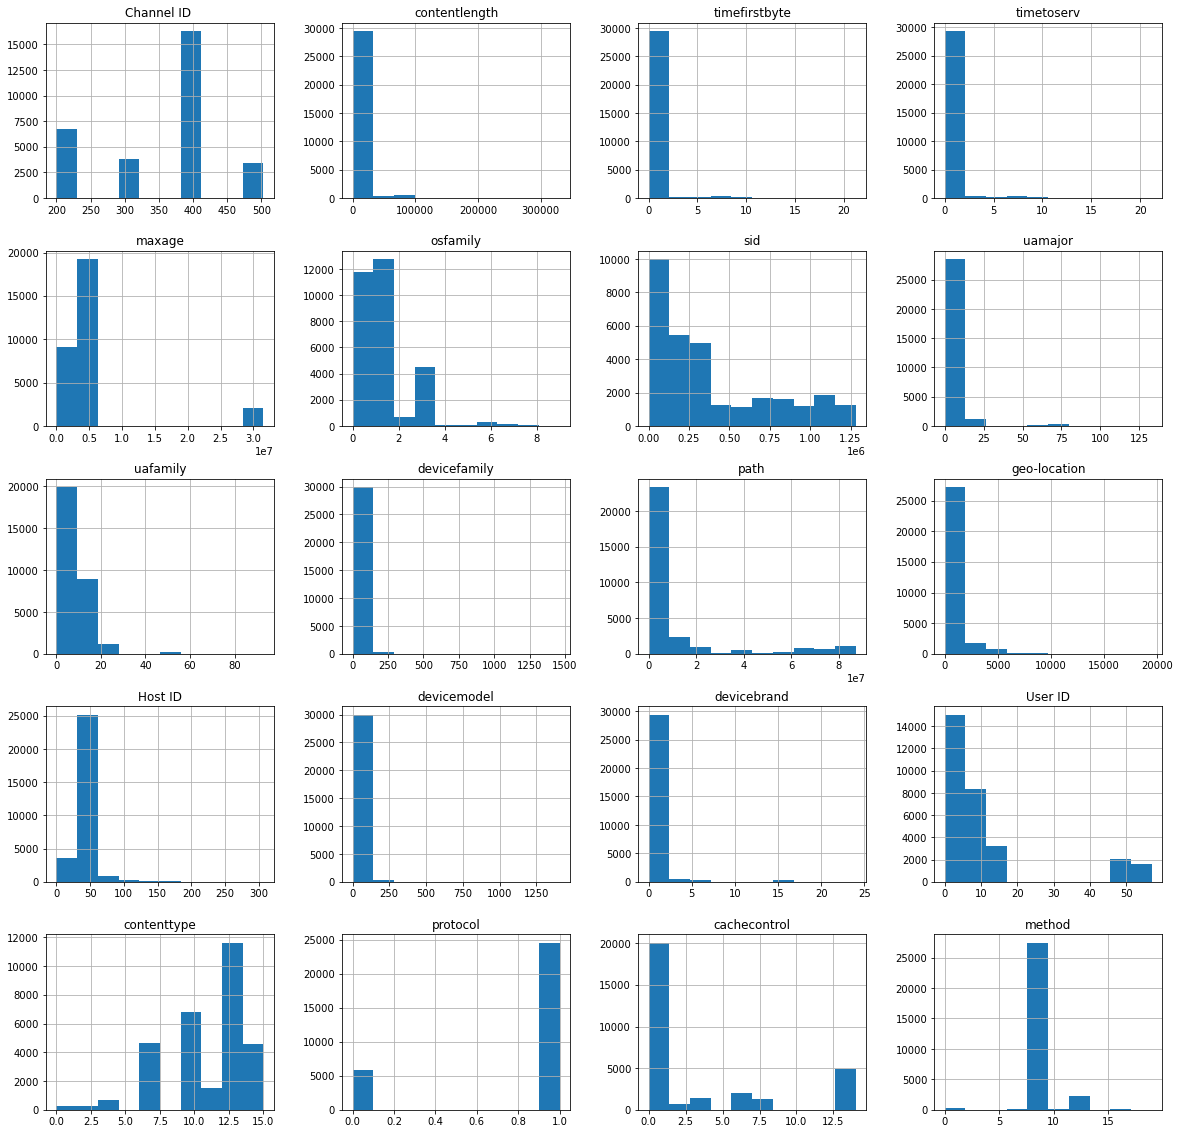

In [42]:
# Plot histograms of each parameter 
updated_df4.hist(figsize = (20, 20))
plt.show()

In [43]:
from sklearn.preprocessing import OneHotEncoder
updated_df5=pd.get_dummies(data=updated_df3, columns=['Channel ID ','contentlength','timefirstbyte','timetoserv','maxage','osfamily','sid','uamajor','uafamily','devicefamily','path','geo-location','Host ID','devicemodel','devicebrand','User ID'])

In [44]:
updated_df9=pd.concat([updated_df5,updated_df2], axis='columns')
updated_df9

Channel ID _200  Channel ID _206  Channel ID _301  Channel ID _302  \
0                    0                1                0                0   
1                    0                0                0                0   
2                    0                0                0                0   
3                    0                0                0                0   
4                    0                0                0                0   
...                ...              ...              ...              ...   
30360                0                0                0                0   
30361                0                0                0                0   
30362                0                1                0                0   
30363                0                0                0                0   
30364                0                0                0                0   

       Channel ID _304  Channel ID _400  Channel ID _401  Channel ID _403  \
0                    0                0                0                0   
1                    0                0                0                0   
2                    0                0                0                1   
3                    0                0                0                0   
4                    0                0                0                0   
...                ...              ...              ...              ...   
30360                0                0                0                1   
30361                0                0                0                0   
30362                0                0                0                0   
30363                0                0                0                0   
30364                1                0                0                0   

       Channel ID _404  Channel ID _405  ...  User ID_46.0  User ID_47.0  \
0                    0                0  ...             0             0   
1                    0                0  ...             0             0   
2                    0                0  ...             0             0   
3                    0                0  ...             0             0   
4                    0                0  ...             0             0   
...                ...              ...  ...           ...           ...   
30360                0                0  ...             0             0   
30361                0                0  ...             0             0   
30362                0                0  ...             0             0   
30363                0                1  ...             0             0   
30364                0                0  ...             0             0   

       User ID_50.0  User ID_53.0  User ID_54.0  User ID_57.0  contenttype  \
0                 0             0             0             0           14   
1                 0             0             0             0           10   
2                 0             0             0             0           12   
3                 0             0             0             0           10   
4                 0             0             0             0           10   
...             ...           ...           ...           ...          ...   
30360             0             0             0             0           12   
30361             0             0             0             0           10   
30362             0             0             0             0           14   
30363             0             1             0             0           12   
30364             0             0             0             0            7   

       protocol  cachecontrol  method  
0             1             6       8  
1             1             0       8  
2             0             0       8  
3             1             0       8  
4             1             0       8  
...         ...           ...     ...  
30360         0            

In [45]:
updated_df9.describe()

Channel ID _200  Channel ID _206  Channel ID _301  Channel ID _302  \
count     30365.000000     30365.000000     30365.000000     30365.000000   
mean          0.110818         0.111345         0.000560         0.013963   
std           0.313912         0.314564         0.023655         0.117341   
min           0.000000         0.000000         0.000000         0.000000   
25%           0.000000         0.000000         0.000000         0.000000   
50%           0.000000         0.000000         0.000000         0.000000   
75%           0.000000         0.000000         0.000000         0.000000   
max           1.000000         1.000000         1.000000         1.000000   

       Channel ID _304  Channel ID _400  Channel ID _401  Channel ID _403  \
count     30365.000000     30365.000000     30365.000000     30365.000000   
mean          0.112070         0.112432         0.000033         0.111773   
std           0.315458         0.315903         0.005739         0.315093   
min           0.000000         0.000000         0.000000         0.000000   
25%           0.000000         0.000000         0.000000         0.000000   
50%           0.000000         0.000000         0.000000         0.000000   
75%           0.000000         0.000000         0.000000         0.000000   
max           1.000000         1.000000         1.000000         1.000000   

       Channel ID _404  Channel ID _405  ...  User ID_46.0  User ID_47.0  \
count     30365.000000     30365.000000  ...  30365.000000  30365.000000   
mean          0.110621         0.091685  ...      0.003524      0.064811   
std           0.313667         0.288585  ...      0.059258      0.246197   
min           0.000000         0.000000  ...      0.000000      0.000000   
25%           0.000000         0.000000  ...      0.000000      0.000000   
50%           0.000000         0.000000  ...      0.000000      0.000000   
75%           0.000000         0.000000  ...      0.000000      0.000000   
max           1.000000         1.000000  ...      1.000000      1.000000   

       User ID_50.0  User ID_53.0  User ID_54.0  User ID_57.0   contenttype  \
count  30365.000000  30365.000000  30365.000000  30365.000000  30365.000000   
mean       0.000198      0.049037      0.004479      0.000198     10.720007   
std        0.014056      0.215948      0.066775      0.014056      2.741675   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000     10.000000   
50%        0.000000      0.000000      0.000000      0.000000     12.000000   
75%        0.000000      0.000000      0.000000      0.000000     12.000000   
max        1.000000      1.000000      1.000000      1.000000     15.000000   

           protocol  cachecontrol        method  
count  30365.000000  30365.000000  30365.000000  
mean       0.807706      3.206685      8.247884  
std        0.394109      5.150824      1.512356  
min        0.000000      0.000000      0.000000  
25%        1.000000      0.000000      8.000000  
50%        1.000000      0.000000      8.000000  
75%        1.000000      6.000000      8.000000  
max        1.000000     14.000000     19.000000  

[8 rows x 57597 columns]

In [46]:
# MinMaxScaler
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(data_chosen)
data_chosen = pd.DataFrame(np_scaled, columns=data_chosen.columns)

In [47]:
# Importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import seaborn as sns
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest

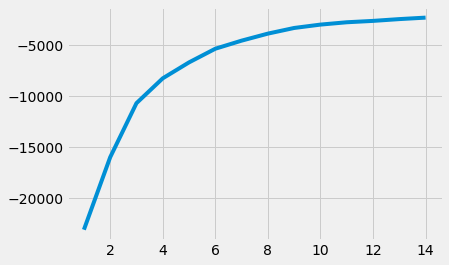

In [48]:
# To detect optimal number of clusters, here I plot elbow curve

n_cluster = range(1, 15)
kmeans = [KMeans(n_clusters=i, random_state=42).fit(data_chosen) for i in n_cluster]
scores = [kmeans[i].score(data_chosen) for i in range(len(kmeans))]
fig, ax = plt.subplots()
ax.plot(n_cluster, scores)
plt.show()

In [57]:
# Assigning cluster number to each data point

cluster_model = kmeans[2]
updated_df9['cluster'] = cluster_model.predict(data_chosen)
updated_df9['cluster'].value_counts()

1    14273
0    10253
2     5839
Name: cluster, dtype: int64

In [58]:
# Visualising multidimensional data in 2D plane

tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=500, random_state=42)
tsne_results = tsne.fit_transform(data_chosen)
updated_df9['tsne-2d-one'] = tsne_results[:,0]
updated_df9['tsne-2d-two'] = tsne_results[:,1]

In [59]:
updated_df9.isnull().values.any()

False

In [60]:
# Finding cluster centroids 

tsne_cluster = updated_df9.groupby('cluster').agg({'tsne-2d-one':'mean', 'tsne-2d-two':'mean'}).reset_index()

In [61]:
updated_df9.isnull().values.any()

False

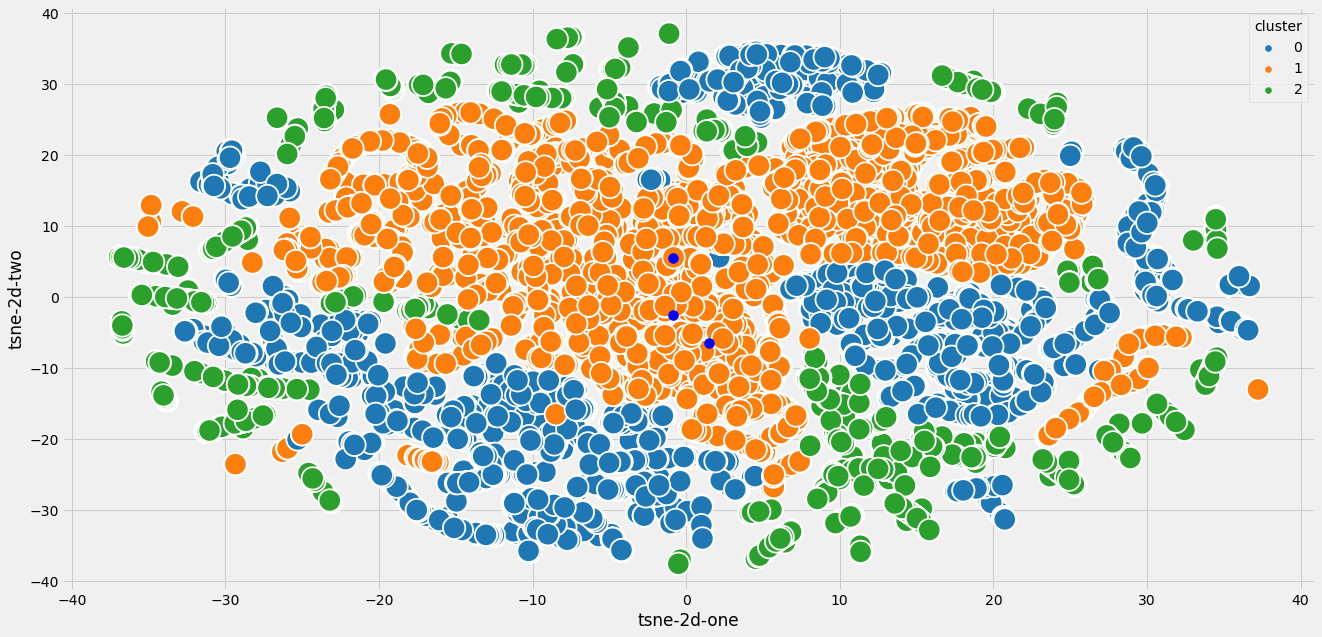

In [63]:
# Plotting 2D Scatterplot visualisation coloured according to cluster

plt.figure(figsize=(20,10))

sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    data=updated_df9,
    hue="cluster",
    palette=sns.color_palette("tab10", 3),
    legend="full",
    alpha=1,
    s=500
)

plt.scatter(x="tsne-2d-one", y="tsne-2d-two", data=tsne_cluster, s=100, c='b')

plt.show()

In [64]:
# Function to calculate sum of squared distance between each data point and centroid

def get_sum_square_distance(data, cluster_model):
    centers = cluster_model.cluster_centers_
    points = np.asarray(data[data_chosen.columns])
    total_distance = pd.Series(dtype='float64')
    for i in range(len(points)):
        distance = 0
        for j in range(len(centers)):
            a = np.linalg.norm(points[i] - centers[j])
            distance += a**2
        total_distance.at[i]= distance
    
    return total_distance

updated_df9['ssd'] = get_sum_square_distance(data_chosen, cluster_model)

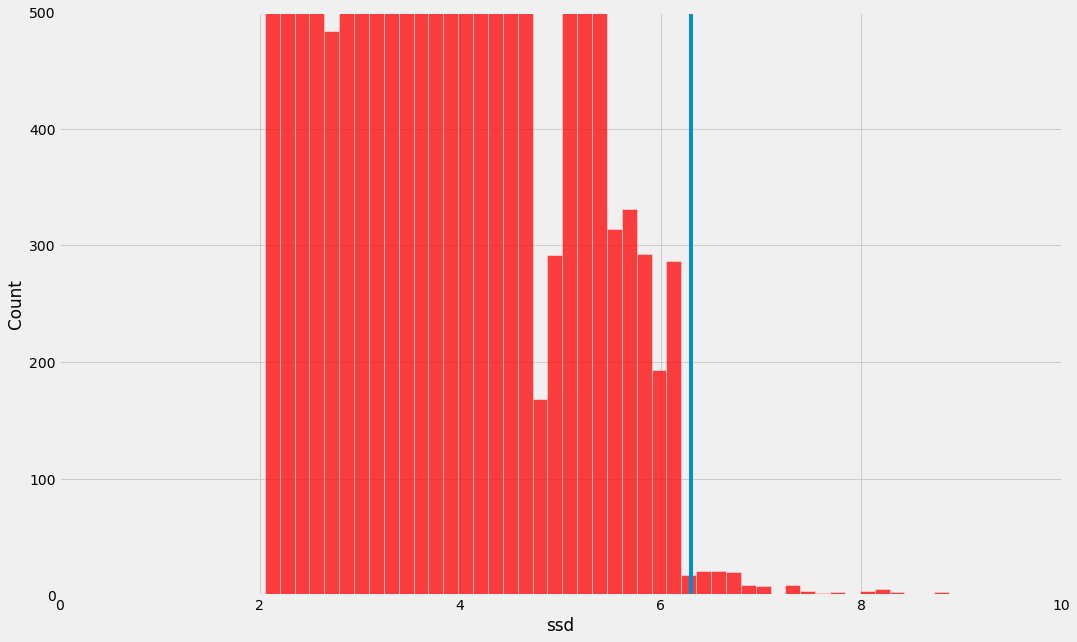

In [73]:
# Ploting histogram on sum of squared distance to find cutoff for anomalous requests

plt.figure(figsize=(16,10))
histo = sns.histplot(data=updated_df9,x="ssd",bins=50,color='red')
histo.set(xlim=(0,10),ylim=(0,500))
plt.axvline(6.3, 0, label="Cutoff")

In [74]:
# Labelling KMean Anomalies 

cutoff = 6.3
updated_df9['anomaly_kmeans'] = (updated_df9['ssd'] >= cutoff).astype(int)

<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

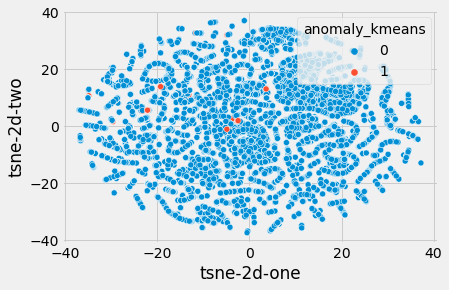

In [75]:
# Scatterplot visualisation of anomalous requests

sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="anomaly_kmeans",
    data=updated_df9,
    legend="full",
    alpha=1
)

In [76]:
len(updated_df9[updated_df9['anomaly_kmeans']==1])

122

In [77]:
updated_df9

Channel ID _200  Channel ID _206  Channel ID _301  Channel ID _302  \
0                    0                1                0                0   
1                    0                0                0                0   
2                    0                0                0                0   
3                    0                0                0                0   
4                    0                0                0                0   
...                ...              ...              ...              ...   
30360                0                0                0                0   
30361                0                0                0                0   
30362                0                1                0                0   
30363                0                0                0                0   
30364                0                0                0                0   

       Channel ID _304  Channel ID _400  Channel ID _401  Channel ID _403  \
0                    0                0                0                0   
1                    0                0                0                0   
2                    0                0                0                1   
3                    0                0                0                0   
4                    0                0                0                0   
...                ...              ...              ...              ...   
30360                0                0                0                1   
30361                0                0                0                0   
30362                0                0                0                0   
30363                0                0                0                0   
30364                1                0                0                0   

       Channel ID _404  Channel ID _405  ...  User ID_57.0  contenttype  \
0                    0                0  ...             0           14   
1                    0                0  ...             0           10   
2                    0                0  ...             0           12   
3                    0                0  ...             0           10   
4                    0                0  ...             0           10   
...                ...              ...  ...           ...          ...   
30360                0                0  ...             0           12   
30361                0                0  ...             0           10   
30362                0                0  ...             0           14   
30363                0                1  ...             0           12   
30364                0                0  ...             0            7   

       protocol  cachecontrol  method  cluster  tsne-2d-one  tsne-2d-two  \
0             1             6       8        0    -9.509945   -17.004356   
1             1             0       8        1     3.440915   -12.582456   
2             0             0       8        2   -28.619423   -17.357136   
3             1             0       8        1    -5.189574     8.746984   
4             1             0       8        1    17.130600    15.810157   
...         ...           ...     ...      ...          ...          ...   
30360         0             0       8        2   -29.544218     8.568786   
30361         1             0       8        1    -1.378971    -1.225803   
30362         1             6       8        0    13.630788     2.545448   
30363         1             0       5        1   -25.419420     5.111404   
30364         1            14       8        0    16.247416   -15.544655   

            ssd  anomaly_kmeans  
0      5.032442               0  
1      3.020792               0  
2      3.057255               0  
3      2.229468               0  
4      2.312254               0  
...         ...             ...  
30360  3.103280               0  
30361  3.801104               0  
30362  5.218722               0  
303

In [78]:
# Estimating fraction of outliers based on KMeans

outlier_fraction = len(updated_df9[updated_df9['anomaly_kmeans']==1])/len(updated_df9)
print(outlier_fraction)

0.0040177836324715955


## Isolation forest 

In [79]:
# Generating Isolation Forest model using 1% contamination
model =  IsolationForest(n_jobs=-1, n_estimators=200, max_features=3, random_state=42, contamination=0.01)

In [80]:
model.fit(data_chosen)

IsolationForest(contamination=0.01, max_features=3, n_estimators=200, n_jobs=-1,
                random_state=42)

In [81]:
updated_df9['anomaly_isolated'] = pd.Series(model.predict(data_chosen))

In [82]:
# Labelling anomalous requests detected by Isolation Forest 

updated_df9['anomaly_isolated'] = updated_df9['anomaly_isolated'].map( {1: 0, -1: 1} )
updated_df9['anomaly_isolated'].value_counts()

0    30061
1      304
Name: anomaly_isolated, dtype: int64

<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

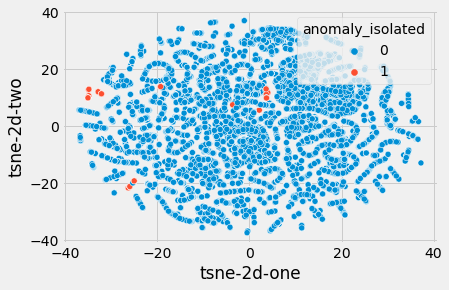

In [83]:
# Scatterplot visualisation 

sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="anomaly_isolated",
    data=updated_df9,
    legend="full",
    alpha=1
)

In [84]:
anomaly=updated_df9['anomaly_isolated']

In [85]:
# filter outlier index
from numpy import quantile, random, where
outlier_index = where(anomaly == 1) 
outlier_index

(array([  210,   250,   621,   663,   726,   818,   924,  1053,  1478,
         1541,  1999,  2035,  2334,  2412,  2754,  2756,  2778,  2958,
         3038,  3204,  3330,  3607,  3611,  3697,  3826,  3889,  3929,
         3972,  4087,  4202,  4292,  4376,  4615,  4618,  4703,  4758,
         4854,  4912,  4968,  4975,  5054,  5084,  5137,  5145,  5194,
         5231,  5303,  5353,  5589,  5596,  5599,  5611,  5673,  5761,
         5920,  6036,  6058,  6130,  6345,  6399,  6471,  6479,  6512,
         6616,  6672,  6721,  6781,  6806,  6836,  6852,  7029,  7035,
         7165,  7268,  7378,  7710,  7760,  8081,  8109,  8231,  8390,
         8428,  8447,  8450,  8456,  8529,  8533,  8567,  8832,  9041,
         9047,  9314,  9407,  9461,  9511,  9537,  9732,  9755,  9817,
         9888,  9892, 10004, 10107, 10198, 10301, 10498, 10569, 10701,
        10827, 10948, 11029, 11111, 11375, 11634, 11773, 11778, 11787,
        11967, 12167, 12175, 12448, 12457, 12519, 12607, 12647, 12686,
      

In [86]:
# negative values are outliers and positives inliers# filter outlier values
outlier_values = updated_df9.iloc[outlier_index]
outlier_values

Channel ID _200  Channel ID _206  Channel ID _301  Channel ID _302  \
210                  0                0                0                1   
250                  0                0                0                0   
621                  0                0                0                0   
663                  0                0                0                0   
726                  0                0                0                0   
...                ...              ...              ...              ...   
30110                0                0                0                1   
30171                0                0                0                0   
30200                0                0                0                0   
30214                0                0                0                0   
30324                0                0                0                0   

       Channel ID _304  Channel ID _400  Channel ID _401  Channel ID _403  \
210                  0                0                0                0   
250                  0                0                0                0   
621                  0                0                0                0   
663                  0                0                0                0   
726                  0                0                0                1   
...                ...              ...              ...              ...   
30110                0                0                0                0   
30171                0                0                0                0   
30200                0                0                0                0   
30214                0                0                0                0   
30324                0                0                0                0   

       Channel ID _404  Channel ID _405  ...  contenttype  protocol  \
210                  0                0  ...           12         1   
250                  1                0  ...            0         1   
621                  1                0  ...            0         1   
663                  1                0  ...            0         1   
726                  0                0  ...           10         1   
...                ...              ...  ...          ...       ...   
30110                0                0  ...           12         1   
30171                1                0  ...            0         1   
30200                1                0  ...            0         1   
30214                0                1  ...           12         1   
30324                1                0  ...            0         1   

       cachecontrol  method  cluster  tsne-2d-one  tsne-2d-two       ssd  \
210               0       8        1     3.458548    12.798952  4.913628   
250               7       8        1   -32.111633    11.353467  5.609171   
621               7       8        1   -25.004879   -19.287848  5.745936   
663               7       8        1   -32.111130    11.353501  5.609225   
726               8       8        0     2.143954     5.611220  4.367604   
...             ...     ...      ...          ...          ...       ...   
30110             0       8        1   -19.268406    13.890424  7.085024   
30171             7       8        1   -32.112347    11.353588  5.609179   
30200             7       8        1   -25.010454   -19.301561  5.664994   
30214             0      12        1     3.705243     9.888031  4.158537   
30324             7       8        1   -25.004879   -19.287846  5.745929   

       anomaly_kmeans  anomaly_isolated  
210                 0                 1  
250                 0                 1  
621                 0                 1  
663                 0                 1  
726                 0                 1  
...               ...               ...  
30110               1                 1  
30171               0                 1  
30200        

## Local Outlier Filter

In [87]:
from sklearn.neighbors import LocalOutlierFactor
# model specification
model1 = LocalOutlierFactor(n_neighbors = 20, metric = "euclidean", contamination=0.01, novelty=True)# model fitting

In [88]:
model1.fit(data_chosen)

LocalOutlierFactor(contamination=0.01, metric='euclidean', novelty=True)

In [89]:
updated_df9['anomaly_isolated'] = pd.Series(model1.predict(data_chosen))

In [90]:
# Labelling anomalous requests detected by Isolation Forest 

updated_df9['anomaly_isolated'] = updated_df9['anomaly_isolated'].map( {1: 0, -1: 1} )
updated_df9['anomaly_isolated'].value_counts()

0    30071
1      294
Name: anomaly_isolated, dtype: int64

In [91]:
anomaly=updated_df9['anomaly_isolated']

In [92]:
# filter outlier index
from numpy import quantile, random, where
outlier_index = where(anomaly == 1) 
outlier_index

(array([  271,   364,   391,   426,   504,   511,   519,   804,   858,
          894,  1045,  1087,  1158,  1251,  1284,  1470,  1591,  1596,
         1611,  1628,  1694,  1753,  1793,  1799,  2023,  2167,  2175,
         2251,  2266,  2332,  2403,  2459,  2550,  3104,  3133,  3180,
         3223,  3416,  3456,  3560,  3846,  3950,  4024,  4151,  4289,
         4373,  4479,  4527,  4561,  4598,  4683,  5038,  5170,  5260,
         5306,  5544,  5553,  5747,  5907,  6051,  6174,  6528,  6680,
         6964,  7000,  7093,  7222,  7348,  7401,  7426,  7570,  7660,
         7918,  7934,  8027,  8146,  8247,  8298,  8434,  8470,  8727,
         8731,  8744,  8879,  9106,  9124,  9174,  9298,  9469,  9486,
         9752, 10332, 10493, 10510, 10645, 10687, 10707, 11017, 11299,
        11398, 11465, 11532, 11817, 11868, 11939, 12301, 12339, 12605,
        12685, 12813, 12815, 12821, 12902, 12927, 12944, 13188, 13201,
        13279, 13318, 13388, 13431, 13539, 13604, 13699, 13842, 13858,
      

In [93]:
# negative values are outliers and positives inliers# filter outlier values
outlier_values = updated_df9.iloc[outlier_index]
outlier_values

Channel ID _200  Channel ID _206  Channel ID _301  Channel ID _302  \
271                  0                0                0                0   
364                  0                0                0                0   
391                  0                0                0                0   
426                  0                0                0                0   
504                  0                0                0                0   
...                ...              ...              ...              ...   
30073                0                0                0                0   
30173                0                0                0                0   
30202                0                0                0                0   
30237                0                0                0                0   
30273                0                0                0                0   

       Channel ID _304  Channel ID _400  Channel ID _401  Channel ID _403  \
271                  0                0                0                0   
364                  0                0                0                0   
391                  0                0                0                0   
426                  0                0                0                0   
504                  0                0                0                0   
...                ...              ...              ...              ...   
30073                0                1                0                0   
30173                0                0                0                0   
30202                0                0                0                0   
30237                0                0                0                0   
30273                0                1                0                0   

       Channel ID _404  Channel ID _405  ...  contenttype  protocol  \
271                  0                1  ...           12         1   
364                  0                1  ...           12         1   
391                  0                1  ...           12         0   
426                  0                0  ...           10         1   
504                  0                1  ...           12         0   
...                ...              ...  ...          ...       ...   
30073                0                0  ...           12         0   
30173                0                1  ...           12         1   
30202                0                1  ...           12         1   
30237                0                1  ...           12         0   
30273                0                0  ...           12         0   

       cachecontrol  method  cluster  tsne-2d-one  tsne-2d-two       ssd  \
271               0      12        1   -26.191704     6.650024  3.867135   
364               0       9        1   -25.308294     5.451507  3.082203   
391               0      11        2    18.086578   -20.564127  4.512635   
426               0       8        1    -9.267884    -1.371294  3.837882   
504               0      11        2    14.580026   -22.697105  4.924679   
...             ...     ...      ...          ...          ...       ...   
30073             0       0        2   -23.129505    -0.876422  3.734171   
30173             0      12        1   -26.191706     6.650025  3.867133   
30202             0      12        1   -26.191704     6.650024  3.867139   
30237             0       9        2    -1.296574    24.650087  3.072752   
30273             0       0        2   -26.797564   -12.793630  4.561047   

       anomaly_kmeans  anomaly_isolated  
271                 0                 1  
364                 0                 1  
391                 0                 1  
426                 0                 1  
504                 0                 1  
...               ...               ...  
30073               0                 1  
30173               0                 1  
30202        

<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

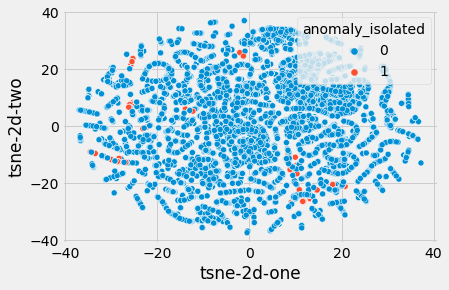

In [94]:
# Scatterplot visualisation 

sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="anomaly_isolated",
    data=updated_df9,
    legend="full",
    alpha=1
)

# 2% contamination

In [95]:
# Generating Isolation Forest model using 2% contamination
outlier_fraction = 0.02
model =  IsolationForest(n_jobs=-1, n_estimators=200, max_features=3, random_state=42, contamination=0.02)

In [96]:
model.fit(data_chosen)

IsolationForest(contamination=0.02, max_features=3, n_estimators=200, n_jobs=-1,
                random_state=42)

In [97]:
updated_df9['anomaly_isolated'] = pd.Series(model.predict(data_chosen))

In [98]:
# Labelling anomalous requests detected by Isolation Forest 

updated_df9['anomaly_isolated'] = updated_df9['anomaly_isolated'].map( {1: 0, -1: 1} )
updated_df9['anomaly_isolated'].value_counts()

0    29757
1      608
Name: anomaly_isolated, dtype: int64

In [99]:
anomaly=updated_df9['anomaly_isolated']

In [100]:
# filter outlier index
from numpy import quantile, random, where
outlier_index = where(anomaly == 1) 
outlier_index

(array([  147,   161,   210,   250,   369,   370,   373,   572,   621,
          663,   696,   726,   764,   818,   873,   889,   924,   951,
         1004,  1008,  1053,  1188,  1244,  1339,  1431,  1478,  1541,
         1550,  1551,  1789,  1885,  1999,  2035,  2334,  2358,  2412,
         2705,  2754,  2756,  2778,  2877,  2932,  2958,  2969,  3038,
         3092,  3127,  3142,  3157,  3204,  3330,  3466,  3514,  3533,
         3540,  3585,  3596,  3607,  3611,  3697,  3699,  3707,  3718,
         3754,  3826,  3889,  3929,  3948,  3972,  4071,  4087,  4157,
         4170,  4202,  4213,  4248,  4292,  4376,  4384,  4427,  4451,
         4500,  4615,  4618,  4638,  4703,  4758,  4826,  4854,  4912,
         4946,  4968,  4975,  4998,  5054,  5084,  5137,  5145,  5164,
         5189,  5194,  5231,  5296,  5303,  5353,  5361,  5414,  5447,
         5589,  5596,  5599,  5611,  5673,  5755,  5761,  5920,  5995,
         6036,  6058,  6120,  6130,  6185,  6236,  6248,  6310,  6345,
      

In [101]:
# negative values are outliers and positives inliers# filter outlier values
outlier_values = updated_df9.iloc[outlier_index]
outlier_values

Channel ID _200  Channel ID _206  Channel ID _301  Channel ID _302  \
147                  0                0                0                0   
161                  1                0                0                0   
210                  0                0                0                1   
250                  0                0                0                0   
369                  0                1                0                0   
...                ...              ...              ...              ...   
30200                0                0                0                0   
30214                0                0                0                0   
30296                0                0                0                0   
30324                0                0                0                0   
30348                0                1                0                0   

       Channel ID _304  Channel ID _400  Channel ID _401  Channel ID _403  \
147                  0                0                0                0   
161                  0                0                0                0   
210                  0                0                0                0   
250                  0                0                0                0   
369                  0                0                0                0   
...                ...              ...              ...              ...   
30200                0                0                0                0   
30214                0                0                0                0   
30296                0                0                0                0   
30324                0                0                0                0   
30348                0                0                0                0   

       Channel ID _404  Channel ID _405  ...  contenttype  protocol  \
147                  0                0  ...           10         1   
161                  0                0  ...           15         1   
210                  0                0  ...           12         1   
250                  1                0  ...            0         1   
369                  0                0  ...           14         1   
...                ...              ...  ...          ...       ...   
30200                1                0  ...            0         1   
30214                0                1  ...           12         1   
30296                0                0  ...           10         1   
30324                1                0  ...            0         1   
30348                0                0  ...           14         1   

       cachecontrol  method  cluster  tsne-2d-one  tsne-2d-two       ssd  \
147               0       8        1     0.377419     2.927927  4.989497   
161               4       8        0   -18.787369   -17.414240  3.533727   
210               0       8        1     3.458548    12.798952  4.913628   
250               7       8        1   -32.111633    11.353467  5.609171   
369               7       8        0   -27.607656    17.163258  3.272300   
...             ...     ...      ...          ...          ...       ...   
30200             7       8        1   -25.010454   -19.301561  5.664994   
30214             0      12        1     3.705243     9.888031  4.158537   
30296             0       8        1    -9.654777    -0.393569  4.096696   
30324             7       8        1   -25.004879   -19.287846  5.745929   
30348             7       8        0   -29.705330    19.643080  3.359605   

       anomaly_kmeans  anomaly_isolated  
147                 0                 1  
161                 0                 1  
210                 0                 1  
250                 0                 1  
369                 0                 1  
...               ...               ...  
30200               0                 1  
30214               0                 1  
30296        

<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

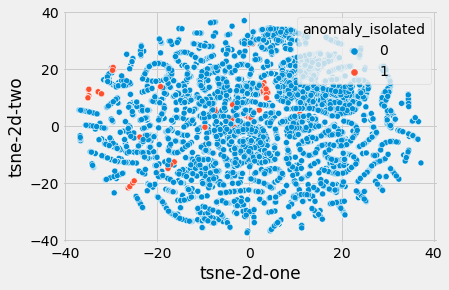

In [102]:
# Scatterplot visualisation 

sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="anomaly_isolated",
    data=updated_df9,
    legend="full",
    alpha=1
)

In [103]:
#LOF

In [104]:
model1 = LocalOutlierFactor(n_neighbors = 20, metric = "euclidean", contamination=0.02, novelty=True)# model fitting

In [105]:
model1.fit(data_chosen)

LocalOutlierFactor(contamination=0.02, metric='euclidean', novelty=True)

In [106]:
updated_df9['anomaly_isolated'] = pd.Series(model1.predict(data_chosen))

In [107]:
# Labelling anomalous requests detected by LOF

updated_df9['anomaly_isolated'] = updated_df9['anomaly_isolated'].map( {1: 0, -1: 1} )
updated_df9['anomaly_isolated'].value_counts()

0    29791
1      574
Name: anomaly_isolated, dtype: int64

In [108]:
anomaly=updated_df9['anomaly_isolated']

In [109]:
# filter outlier index
from numpy import quantile, random, where
outlier_index = where(anomaly == 1) 
outlier_index

(array([  220,   271,   273,   364,   391,   426,   445,   453,   504,
          511,   519,   622,   804,   858,   894,   947,   981,  1045,
         1087,  1158,  1251,  1284,  1320,  1434,  1458,  1470,  1591,
         1596,  1611,  1613,  1628,  1678,  1694,  1710,  1753,  1793,
         1799,  1825,  1994,  2023,  2065,  2167,  2175,  2190,  2201,
         2251,  2266,  2272,  2332,  2369,  2396,  2403,  2459,  2550,
         2677,  2695,  2778,  2845,  2905,  2950,  3104,  3133,  3178,
         3180,  3223,  3404,  3416,  3456,  3512,  3560,  3609,  3779,
         3825,  3846,  3885,  3918,  3950,  4005,  4024,  4082,  4087,
         4151,  4163,  4202,  4289,  4373,  4479,  4527,  4528,  4540,
         4561,  4598,  4604,  4618,  4683,  4689,  4731,  4758,  4820,
         4844,  4961,  5038,  5132,  5170,  5260,  5294,  5306,  5331,
         5386,  5410,  5418,  5544,  5553,  5662,  5728,  5747,  5853,
         5907,  5946,  5973,  5990,  6014,  6051,  6156,  6164,  6174,
      

In [110]:
# negative values are outliers and positives inliers# filter outlier values
outlier_values = updated_df9.iloc[outlier_index]
outlier_values

Channel ID _200  Channel ID _206  Channel ID _301  Channel ID _302  \
220                  0                0                0                0   
271                  0                0                0                0   
273                  0                0                0                0   
364                  0                0                0                0   
391                  0                0                0                0   
...                ...              ...              ...              ...   
30073                0                0                0                0   
30173                0                0                0                0   
30202                0                0                0                0   
30237                0                0                0                0   
30273                0                0                0                0   

       Channel ID _304  Channel ID _400  Channel ID _401  Channel ID _403  \
220                  0                0                0                0   
271                  0                0                0                0   
273                  0                0                0                1   
364                  0                0                0                0   
391                  0                0                0                0   
...                ...              ...              ...              ...   
30073                0                1                0                0   
30173                0                0                0                0   
30202                0                0                0                0   
30237                0                0                0                0   
30273                0                1                0                0   

       Channel ID _404  Channel ID _405  ...  contenttype  protocol  \
220                  0                1  ...           12         1   
271                  0                1  ...           12         1   
273                  0                0  ...           12         0   
364                  0                1  ...           12         1   
391                  0                1  ...           12         0   
...                ...              ...  ...          ...       ...   
30073                0                0  ...           12         0   
30173                0                1  ...           12         1   
30202                0                1  ...           12         1   
30237                0                1  ...           12         0   
30273                0                0  ...           12         0   

       cachecontrol  method  cluster  tsne-2d-one  tsne-2d-two       ssd  \
220               0      12        1   -25.980980     6.667761  3.637686   
271               0      12        1   -26.191704     6.650024  3.867135   
273               0       8        2     6.352458   -34.439964  4.240836   
364               0       9        1   -25.308294     5.451507  3.082203   
391               0      11        2    18.086578   -20.564127  4.512635   
...             ...     ...      ...          ...          ...       ...   
30073             0       0        2   -23.129505    -0.876422  3.734171   
30173             0      12        1   -26.191706     6.650025  3.867133   
30202             0      12        1   -26.191704     6.650024  3.867139   
30237             0       9        2    -1.296574    24.650087  3.072752   
30273             0       0        2   -26.797564   -12.793630  4.561047   

       anomaly_kmeans  anomaly_isolated  
220                 0                 1  
271                 0                 1  
273                 0                 1  
364                 0                 1  
391                 0                 1  
...               ...               ...  
30073               0                 1  
30173               0                 1  
30202        

<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

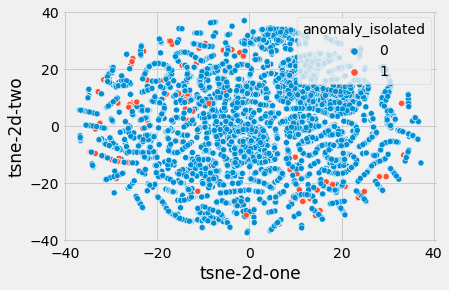

In [111]:
# Scatterplot visualisation 

sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="anomaly_isolated",
    data=updated_df9,
    legend="full",
    alpha=1
)

# 3% contamination

In [112]:
#IF

In [113]:
# Generating Isolation Forest model using 2% contamination
model =  IsolationForest(n_jobs=-1, n_estimators=200, max_features=3, random_state=42, contamination=0.03)
model.fit(data_chosen)
updated_df9['anomaly_isolated'] = pd.Series(model.predict(data_chosen))
# Labelling anomalous requests detected by Isolation Forest 

In [114]:
updated_df9['anomaly_isolated'] = updated_df9['anomaly_isolated'].map( {1: 0, -1: 1} )
updated_df9['anomaly_isolated'].value_counts()

0    29454
1      911
Name: anomaly_isolated, dtype: int64

In [115]:
anomaly=updated_df9['anomaly_isolated']
# filter outlier index
from numpy import quantile, random, where
outlier_index = where(anomaly == 1) 
outlier_index

(array([  138,   147,   154,   161,   183,   204,   210,   250,   355,
          369,   370,   373,   403,   416,   545,   572,   590,   607,
          621,   663,   696,   726,   764,   779,   803,   808,   818,
          873,   885,   889,   912,   916,   924,   951,  1004,  1008,
         1021,  1053,  1072,  1100,  1105,  1188,  1244,  1339,  1385,
         1431,  1478,  1490,  1512,  1541,  1550,  1551,  1552,  1560,
         1769,  1789,  1885,  1999,  2035,  2063,  2129,  2143,  2153,
         2255,  2301,  2334,  2358,  2362,  2372,  2412,  2471,  2513,
         2521,  2624,  2705,  2754,  2756,  2778,  2797,  2855,  2862,
         2877,  2932,  2949,  2958,  2969,  3038,  3039,  3092,  3127,
         3142,  3157,  3204,  3282,  3330,  3347,  3414,  3466,  3514,
         3533,  3540,  3585,  3596,  3607,  3611,  3649,  3697,  3699,
         3707,  3716,  3718,  3744,  3754,  3755,  3819,  3826,  3889,
         3929,  3932,  3946,  3948,  3972,  4043,  4064,  4071,  4087,
      

In [116]:
# negative values are outliers and positives inliers# filter outlier values
outlier_values = updated_df9.iloc[outlier_index]
outlier_values

Channel ID _200  Channel ID _206  Channel ID _301  Channel ID _302  \
138                  0                0                0                0   
147                  0                0                0                0   
154                  1                0                0                0   
161                  1                0                0                0   
183                  1                0                0                0   
...                ...              ...              ...              ...   
30200                0                0                0                0   
30214                0                0                0                0   
30296                0                0                0                0   
30324                0                0                0                0   
30348                0                1                0                0   

       Channel ID _304  Channel ID _400  Channel ID _401  Channel ID _403  \
138                  0                0                0                0   
147                  0                0                0                0   
154                  0                0                0                0   
161                  0                0                0                0   
183                  0                0                0                0   
...                ...              ...              ...              ...   
30200                0                0                0                0   
30214                0                0                0                0   
30296                0                0                0                0   
30324                0                0                0                0   
30348                0                0                0                0   

       Channel ID _404  Channel ID _405  ...  contenttype  protocol  \
138                  0                0  ...           10         1   
147                  0                0  ...           10         1   
154                  0                0  ...           14         1   
161                  0                0  ...           15         1   
183                  0                0  ...           13         1   
...                ...              ...  ...          ...       ...   
30200                1                0  ...            0         1   
30214                0                1  ...           12         1   
30296                0                0  ...           10         1   
30324                1                0  ...            0         1   
30348                0                0  ...           14         1   

       cachecontrol  method  cluster  tsne-2d-one  tsne-2d-two       ssd  \
138               0       8        1    -0.295971    -0.643592  3.749496   
147               0       8        1     0.377419     2.927927  4.989497   
154               4       8        0   -17.447056   -12.005204  4.268681   
161               4       8        0   -18.787369   -17.414240  3.533727   
183               2       8        0   -19.659439   -13.333231  4.237052   
...             ...     ...      ...          ...          ...       ...   
30200             7       8        1   -25.010454   -19.301561  5.664994   
30214             0      12        1     3.705243     9.888031  4.158537   
30296             0       8        1    -9.654777    -0.393569  4.096696   
30324             7       8        1   -25.004879   -19.287846  5.745929   
30348             7       8        0   -29.705330    19.643080  3.359605   

       anomaly_kmeans  anomaly_isolated  
138                 0                 1  
147                 0                 1  
154                 0                 1  
161                 0                 1  
183                 0                 1  
...               ...               ...  
30200               0                 1  
30214               0                 1  
30296        

<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

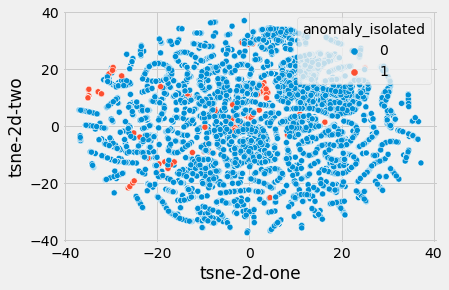

In [117]:
# Scatterplot visualisation 

sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="anomaly_isolated",
    data=updated_df9,
    legend="full",
    alpha=1
)


In [118]:
#LOF
model1 = LocalOutlierFactor(n_neighbors = 20, metric = "euclidean", contamination=0.03, novelty=True)# model fitting
model1.fit(data_chosen)
updated_df9['anomaly_isolated'] = pd.Series(model1.predict(data_chosen))
# Labelling anomalous requests detected by LOF

updated_df9['anomaly_isolated'] = updated_df9['anomaly_isolated'].map( {1: 0, -1: 1} )
updated_df9['anomaly_isolated'].value_counts()

0    29505
1      860
Name: anomaly_isolated, dtype: int64

In [119]:
anomaly=updated_df9['anomaly_isolated']
# filter outlier index
from numpy import quantile, random, where
outlier_index = where(anomaly == 1) 
outlier_index
# negative values are outliers and positives inliers# filter outlier values
outlier_values = updated_df9.iloc[outlier_index]
outlier_values

Channel ID _200  Channel ID _206  Channel ID _301  Channel ID _302  \
24                   0                0                0                0   
39                   0                0                0                0   
85                   1                0                0                0   
207                  1                0                0                0   
220                  0                0                0                0   
...                ...              ...              ...              ...   
30202                0                0                0                0   
30237                0                0                0                0   
30273                0                0                0                0   
30278                1                0                0                0   
30288                1                0                0                0   

       Channel ID _304  Channel ID _400  Channel ID _401  Channel ID _403  \
24                   0                0                0                0   
39                   0                0                0                0   
85                   0                0                0                0   
207                  0                0                0                0   
220                  0                0                0                0   
...                ...              ...              ...              ...   
30202                0                0                0                0   
30237                0                0                0                0   
30273                0                1                0                0   
30278                0                0                0                0   
30288                0                0                0                0   

       Channel ID _404  Channel ID _405  ...  contenttype  protocol  \
24                   0                0  ...           10         1   
39                   0                0  ...           10         1   
85                   0                0  ...           14         1   
207                  0                0  ...            2         1   
220                  0                1  ...           12         1   
...                ...              ...  ...          ...       ...   
30202                0                1  ...           12         1   
30237                0                1  ...           12         0   
30273                0                0  ...           12         0   
30278                0                0  ...           13         1   
30288                0                0  ...           14         1   

       cachecontrol  method  cluster  tsne-2d-one  tsne-2d-two       ssd  \
24                0       8        1     5.490046     4.185488  3.031827   
39                0       8        1     3.853881    18.360075  2.851068   
85                8       8        0   -31.642691    16.284269  3.841251   
207              14       8        0   -29.859201     2.208060  6.180155   
220               0      12        1   -25.980980     6.667761  3.637686   
...             ...     ...      ...          ...          ...       ...   
30202             0      12        1   -26.191704     6.650024  3.867139   
30237             0       9        2    -1.296574    24.650087  3.072752   
30273             0       0        2   -26.797564   -12.793630  4.561047   
30278             2       8        0    -1.771586   -26.490786  3.305806   
30288             4       8        0   -25.741579    -3.581954  3.334838   

       anomaly_kmeans  anomaly_isolated  
24                  0                 1  
39                  0                 1  
85                  0                 1  
207                 0                 1  
220                 0                 1  
...               ...               ...  
30202               0                 1  
30237               0                 1  
30273        

<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

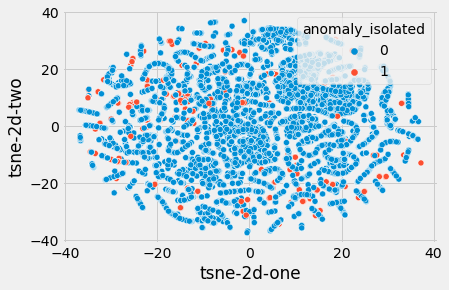

In [120]:
# Scatterplot visualisation 

sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="anomaly_isolated",
    data=updated_df9,
    legend="full",
    alpha=1
)

# 4% contamination

In [121]:
# Generating Isolation Forest model using 2% contamination
model =  IsolationForest(n_jobs=-1, n_estimators=200, max_features=3, random_state=42, contamination=0.04)
model.fit(data_chosen)
updated_df9['anomaly_isolated'] = pd.Series(model.predict(data_chosen))
# Labelling anomalous requests detected by Isolation Forest 

updated_df9['anomaly_isolated'] = updated_df9['anomaly_isolated'].map( {1: 0, -1: 1} )
updated_df9['anomaly_isolated'].value_counts()

0    29157
1     1208
Name: anomaly_isolated, dtype: int64

In [122]:
anomaly=updated_df9['anomaly_isolated']
# filter outlier index
from numpy import quantile, random, where
outlier_index = where(anomaly == 1) 
outlier_index

(array([  138,   141,   147, ..., 30296, 30324, 30348], dtype=int64),)

In [123]:
# negative values are outliers and positives inliers# filter outlier values
outlier_values = updated_df9.iloc[outlier_index]
outlier_values

Channel ID _200  Channel ID _206  Channel ID _301  Channel ID _302  \
138                  0                0                0                0   
141                  1                0                0                0   
147                  0                0                0                0   
154                  1                0                0                0   
161                  1                0                0                0   
...                ...              ...              ...              ...   
30200                0                0                0                0   
30214                0                0                0                0   
30296                0                0                0                0   
30324                0                0                0                0   
30348                0                1                0                0   

       Channel ID _304  Channel ID _400  Channel ID _401  Channel ID _403  \
138                  0                0                0                0   
141                  0                0                0                0   
147                  0                0                0                0   
154                  0                0                0                0   
161                  0                0                0                0   
...                ...              ...              ...              ...   
30200                0                0                0                0   
30214                0                0                0                0   
30296                0                0                0                0   
30324                0                0                0                0   
30348                0                0                0                0   

       Channel ID _404  Channel ID _405  ...  contenttype  protocol  \
138                  0                0  ...           10         1   
141                  0                0  ...           14         1   
147                  0                0  ...           10         1   
154                  0                0  ...           14         1   
161                  0                0  ...           15         1   
...                ...              ...  ...          ...       ...   
30200                1                0  ...            0         1   
30214                0                1  ...           12         1   
30296                0                0  ...           10         1   
30324                1                0  ...            0         1   
30348                0                0  ...           14         1   

       cachecontrol  method  cluster  tsne-2d-one  tsne-2d-two       ssd  \
138               0       8        1    -0.295971    -0.643592  3.749496   
141               4       8        0   -17.491808   -12.032183  4.245680   
147               0       8        1     0.377419     2.927927  4.989497   
154               4       8        0   -17.447056   -12.005204  4.268681   
161               4       8        0   -18.787369   -17.414240  3.533727   
...             ...     ...      ...          ...          ...       ...   
30200             7       8        1   -25.010454   -19.301561  5.664994   
30214             0      12        1     3.705243     9.888031  4.158537   
30296             0       8        1    -9.654777    -0.393569  4.096696   
30324             7       8        1   -25.004879   -19.287846  5.745929   
30348             7       8        0   -29.705330    19.643080  3.359605   

       anomaly_kmeans  anomaly_isolated  
138                 0                 1  
141                 0                 1  
147                 0                 1  
154                 0                 1  
161                 0                 1  
...               ...               ...  
30200               0                 1  
30214               0                 1  
30296        

<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

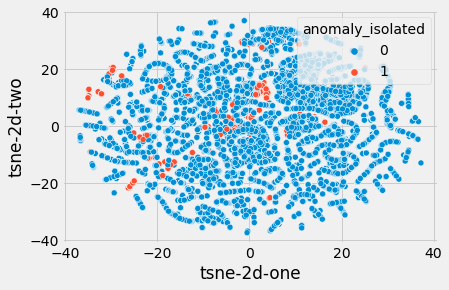

In [124]:
# Scatterplot visualisation 

sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="anomaly_isolated",
    data=updated_df9,
    legend="full",
    alpha=1
)

In [125]:
#LOF
model1 = LocalOutlierFactor(n_neighbors = 20, metric = "euclidean", contamination=0.04, novelty=True)# model fitting
model1.fit(data_chosen)
updated_df9['anomaly_isolated'] = pd.Series(model1.predict(data_chosen))
# Labelling anomalous requests detected by LOF

updated_df9['anomaly_isolated'] = updated_df9['anomaly_isolated'].map( {1: 0, -1: 1} )
updated_df9['anomaly_isolated'].value_counts()


0    29222
1     1143
Name: anomaly_isolated, dtype: int64

In [126]:
anomaly=updated_df9['anomaly_isolated']
# filter outlier index
from numpy import quantile, random, where
outlier_index = where(anomaly == 1) 
outlier_index
# negative values are outliers and positives inliers# filter outlier values
outlier_values = updated_df9.iloc[outlier_index]
outlier_values


Channel ID _200  Channel ID _206  Channel ID _301  Channel ID _302  \
4                    0                0                0                0   
24                   0                0                0                0   
39                   0                0                0                0   
85                   1                0                0                0   
88                   0                1                0                0   
...                ...              ...              ...              ...   
30237                0                0                0                0   
30273                0                0                0                0   
30278                1                0                0                0   
30282                0                0                0                0   
30288                1                0                0                0   

       Channel ID _304  Channel ID _400  Channel ID _401  Channel ID _403  \
4                    0                0                0                0   
24                   0                0                0                0   
39                   0                0                0                0   
85                   0                0                0                0   
88                   0                0                0                0   
...                ...              ...              ...              ...   
30237                0                0                0                0   
30273                0                1                0                0   
30278                0                0                0                0   
30282                0                0                0                0   
30288                0                0                0                0   

       Channel ID _404  Channel ID _405  ...  contenttype  protocol  \
4                    0                0  ...           10         1   
24                   0                0  ...           10         1   
39                   0                0  ...           10         1   
85                   0                0  ...           14         1   
88                   0                0  ...           14         1   
...                ...              ...  ...          ...       ...   
30237                0                1  ...           12         0   
30273                0                0  ...           12         0   
30278                0                0  ...           13         1   
30282                0                0  ...           10         1   
30288                0                0  ...           14         1   

       cachecontrol  method  cluster  tsne-2d-one  tsne-2d-two       ssd  \
4                 0       8        1    17.130600    15.810157  2.312254   
24                0       8        1     5.490046     4.185488  3.031827   
39                0       8        1     3.853881    18.360075  2.851068   
85                8       8        0   -31.642691    16.284269  3.841251   
88                1       8        0     5.646564    26.552183  3.146263   
...             ...     ...      ...          ...          ...       ...   
30237             0       9        2    -1.296574    24.650087  3.072752   
30273             0       0        2   -26.797564   -12.793630  4.561047   
30278             2       8        0    -1.771586   -26.490786  3.305806   
30282             0       8        1   -13.486239    18.277126  2.637479   
30288             4       8        0   -25.741579    -3.581954  3.334838   

       anomaly_kmeans  anomaly_isolated  
4                   0                 1  
24                  0                 1  
39                  0                 1  
85                  0                 1  
88                  0                 1  
...               ...               ...  
30237               0                 1  
30273               0                 1  
30278        

<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

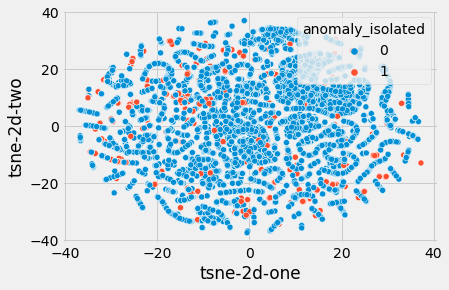

In [127]:
# Scatterplot visualisation 

sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="anomaly_isolated",
    data=updated_df9,
    legend="full",
    alpha=1
)

# 5% contamination

In [128]:
# Generating Isolation Forest model using 2% contamination
model =  IsolationForest(n_jobs=-1, n_estimators=200, max_features=3, random_state=42, contamination=0.05)
model.fit(data_chosen)
updated_df9['anomaly_isolated'] = pd.Series(model.predict(data_chosen))
# Labelling anomalous requests detected by Isolation Forest 

updated_df9['anomaly_isolated'] = updated_df9['anomaly_isolated'].map( {1: 0, -1: 1} )
updated_df9['anomaly_isolated'].value_counts()

0    28851
1     1514
Name: anomaly_isolated, dtype: int64

In [129]:
anomaly=updated_df9['anomaly_isolated']
# filter outlier index
from numpy import quantile, random, where
outlier_index = where(anomaly == 1) 
outlier_index

(array([   27,   138,   140, ..., 30324, 30334, 30348], dtype=int64),)

In [130]:
# negative values are outliers and positives inliers# filter outlier values
outlier_values = updated_df9.iloc[outlier_index]
outlier_values

Channel ID _200  Channel ID _206  Channel ID _301  Channel ID _302  \
27                   0                1                0                0   
138                  0                0                0                0   
140                  0                0                0                0   
141                  1                0                0                0   
147                  0                0                0                0   
...                ...              ...              ...              ...   
30268                0                0                0                0   
30296                0                0                0                0   
30324                0                0                0                0   
30334                0                0                0                0   
30348                0                1                0                0   

       Channel ID _304  Channel ID _400  Channel ID _401  Channel ID _403  \
27                   0                0                0                0   
138                  0                0                0                0   
140                  0                0                0                0   
141                  0                0                0                0   
147                  0                0                0                0   
...                ...              ...              ...              ...   
30268                0                1                0                0   
30296                0                0                0                0   
30324                0                0                0                0   
30334                0                0                0                0   
30348                0                0                0                0   

       Channel ID _404  Channel ID _405  ...  contenttype  protocol  \
27                   0                0  ...           14         1   
138                  0                0  ...           10         1   
140                  0                0  ...           10         1   
141                  0                0  ...           14         1   
147                  0                0  ...           10         1   
...                ...              ...  ...          ...       ...   
30268                0                0  ...           12         0   
30296                0                0  ...           10         1   
30324                1                0  ...            0         1   
30334                0                0  ...           10         1   
30348                0                0  ...           14         1   

       cachecontrol  method  cluster  tsne-2d-one  tsne-2d-two       ssd  \
27                6       8        0    25.082270    20.382334  5.131946   
138               0       8        1    -0.295971    -0.643592  3.749496   
140               0       8        1    -4.021649    -1.843370  3.923222   
141               4       8        0   -17.491808   -12.032183  4.245680   
147               0       8        1     0.377419     2.927927  4.989497   
...             ...     ...      ...          ...          ...       ...   
30268             0       0        2   -34.282192    -9.175476  5.817309   
30296             0       8        1    -9.654777    -0.393569  4.096696   
30324             7       8        1   -25.004879   -19.287846  5.745929   
30334             0       8        1    -5.111415     1.652475  3.888626   
30348             7       8        0   -29.705330    19.643080  3.359605   

       anomaly_kmeans  anomaly_isolated  
27                  0                 1  
138                 0                 1  
140                 0                 1  
141                 0                 1  
147                 0                 1  
...               ...               ...  
30268               0                 1  
30296               0                 1  
30324        

<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

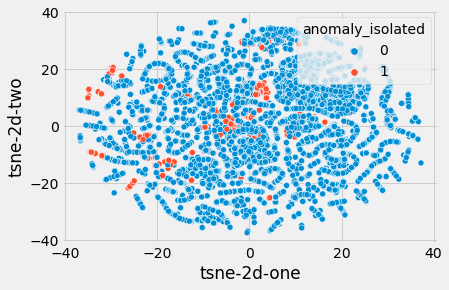

In [131]:
# Scatterplot visualisation 

sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="anomaly_isolated",
    data=updated_df9,
    legend="full",
    alpha=1
)

In [132]:
#LOF
model1 = LocalOutlierFactor(n_neighbors = 20, metric = "euclidean", contamination=0.05, novelty=True)# model fitting
model1.fit(data_chosen)
updated_df9['anomaly_isolated'] = pd.Series(model1.predict(data_chosen))
# Labelling anomalous requests detected by LOF

updated_df9['anomaly_isolated'] = updated_df9['anomaly_isolated'].map( {1: 0, -1: 1} )
updated_df9['anomaly_isolated'].value_counts()


0    28938
1     1427
Name: anomaly_isolated, dtype: int64

In [133]:
anomaly=updated_df9['anomaly_isolated']
# filter outlier index
from numpy import quantile, random, where
outlier_index = where(anomaly == 1) 
outlier_index
# negative values are outliers and positives inliers# filter outlier values
outlier_values = updated_df9.iloc[outlier_index]
outlier_values


Channel ID _200  Channel ID _206  Channel ID _301  Channel ID _302  \
4                    0                0                0                0   
24                   0                0                0                0   
39                   0                0                0                0   
85                   1                0                0                0   
88                   0                1                0                0   
...                ...              ...              ...              ...   
30237                0                0                0                0   
30273                0                0                0                0   
30278                1                0                0                0   
30282                0                0                0                0   
30288                1                0                0                0   

       Channel ID _304  Channel ID _400  Channel ID _401  Channel ID _403  \
4                    0                0                0                0   
24                   0                0                0                0   
39                   0                0                0                0   
85                   0                0                0                0   
88                   0                0                0                0   
...                ...              ...              ...              ...   
30237                0                0                0                0   
30273                0                1                0                0   
30278                0                0                0                0   
30282                0                0                0                0   
30288                0                0                0                0   

       Channel ID _404  Channel ID _405  ...  contenttype  protocol  \
4                    0                0  ...           10         1   
24                   0                0  ...           10         1   
39                   0                0  ...           10         1   
85                   0                0  ...           14         1   
88                   0                0  ...           14         1   
...                ...              ...  ...          ...       ...   
30237                0                1  ...           12         0   
30273                0                0  ...           12         0   
30278                0                0  ...           13         1   
30282                0                0  ...           10         1   
30288                0                0  ...           14         1   

       cachecontrol  method  cluster  tsne-2d-one  tsne-2d-two       ssd  \
4                 0       8        1    17.130600    15.810157  2.312254   
24                0       8        1     5.490046     4.185488  3.031827   
39                0       8        1     3.853881    18.360075  2.851068   
85                8       8        0   -31.642691    16.284269  3.841251   
88                1       8        0     5.646564    26.552183  3.146263   
...             ...     ...      ...          ...          ...       ...   
30237             0       9        2    -1.296574    24.650087  3.072752   
30273             0       0        2   -26.797564   -12.793630  4.561047   
30278             2       8        0    -1.771586   -26.490786  3.305806   
30282             0       8        1   -13.486239    18.277126  2.637479   
30288             4       8        0   -25.741579    -3.581954  3.334838   

       anomaly_kmeans  anomaly_isolated  
4                   0                 1  
24                  0                 1  
39                  0                 1  
85                  0                 1  
88                  0                 1  
...               ...               ...  
30237               0                 1  
30273               0                 1  
30278        

<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

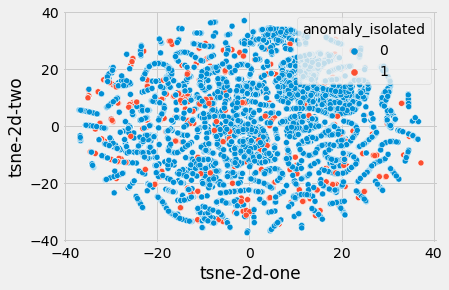

In [134]:
# Scatterplot visualisation 

sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="anomaly_isolated",
    data=updated_df9,
    legend="full",
    alpha=1
)

# 10% contamination

In [135]:
# Generating Isolation Forest model using 2% contamination
outlier_fraction = 0.02
model =  IsolationForest(n_jobs=-1, n_estimators=200, max_features=3, random_state=42, contamination=0.10)
model.fit(data_chosen)
updated_df9['anomaly_isolated'] = pd.Series(model.predict(data_chosen))
# Labelling anomalous requests detected by Isolation Forest 

updated_df9['anomaly_isolated'] = updated_df9['anomaly_isolated'].map( {1: 0, -1: 1} )
updated_df9['anomaly_isolated'].value_counts()

0    27328
1     3037
Name: anomaly_isolated, dtype: int64

In [136]:
anomaly=updated_df9['anomaly_isolated']
# filter outlier index
from numpy import quantile, random, where
outlier_index = where(anomaly == 1) 
outlier_index

(array([   27,    54,    73, ..., 30349, 30356, 30362], dtype=int64),)

In [137]:
# negative values are outliers and positives inliers# filter outlier values
outlier_values = updated_df9.iloc[outlier_index]
outlier_values

Channel ID _200  Channel ID _206  Channel ID _301  Channel ID _302  \
27                   0                1                0                0   
54                   1                0                0                0   
73                   0                0                0                0   
79                   0                1                0                0   
82                   0                1                0                0   
...                ...              ...              ...              ...   
30334                0                0                0                0   
30348                0                1                0                0   
30349                0                0                0                0   
30356                0                0                0                0   
30362                0                1                0                0   

       Channel ID _304  Channel ID _400  Channel ID _401  Channel ID _403  \
27                   0                0                0                0   
54                   0                0                0                0   
73                   0                0                0                0   
79                   0                0                0                0   
82                   0                0                0                0   
...                ...              ...              ...              ...   
30334                0                0                0                0   
30348                0                0                0                0   
30349                0                1                0                0   
30356                0                0                0                0   
30362                0                0                0                0   

       Channel ID _404  Channel ID _405  ...  contenttype  protocol  \
27                   0                0  ...           14         1   
54                   0                0  ...           14         1   
73                   0                0  ...           10         1   
79                   0                0  ...           14         1   
82                   0                0  ...           14         1   
...                ...              ...  ...          ...       ...   
30334                0                0  ...           10         1   
30348                0                0  ...           14         1   
30349                0                0  ...           12         0   
30356                0                0  ...           10         1   
30362                0                0  ...           14         1   

       cachecontrol  method  cluster  tsne-2d-one  tsne-2d-two       ssd  \
27                6       8        0    25.082270    20.382334  5.131946   
54                4       8        0   -20.042318   -10.979253  3.367811   
73                0       8        1    -2.067712     1.716958  5.842622   
79                6       8        0     8.638075    -3.642768  5.434302   
82                1       8        0     3.662501    29.468706  3.245638   
...             ...     ...      ...          ...          ...       ...   
30334             0       8        1    -5.111415     1.652475  3.888626   
30348             7       8        0   -29.705330    19.643080  3.359605   
30349             0       0        2   -27.197525   -12.745704  4.674747   
30356             0       8        1    -0.319396     0.710559  4.373751   
30362             6       8        0    13.630788     2.545448  5.218722   

       anomaly_kmeans  anomaly_isolated  
27                  0                 1  
54                  0                 1  
73                  0                 1  
79                  0                 1  
82                  0                 1  
...               ...               ...  
30334               0                 1  
30348               0                 1  
30349        

<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

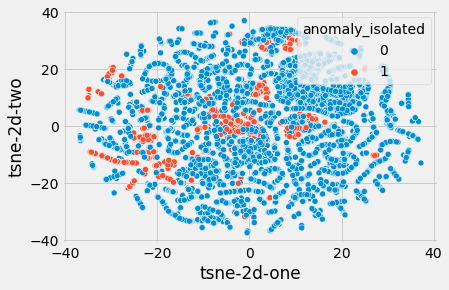

In [138]:
# Scatterplot visualisation 

sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="anomaly_isolated",
    data=updated_df9,
    legend="full",
    alpha=1
)


In [139]:
#LOF
model1 = LocalOutlierFactor(n_neighbors = 20, metric = "euclidean", contamination=0.10, novelty=True)# model fitting
model1.fit(data_chosen)
updated_df9['anomaly_isolated'] = pd.Series(model1.predict(data_chosen))
# Labelling anomalous requests detected by LOF

updated_df9['anomaly_isolated'] = updated_df9['anomaly_isolated'].map( {1: 0, -1: 1} )
updated_df9['anomaly_isolated'].value_counts()


0    27578
1     2787
Name: anomaly_isolated, dtype: int64

In [140]:
anomaly=updated_df9['anomaly_isolated']
# filter outlier index
from numpy import quantile, random, where
outlier_index = where(anomaly == 1) 
outlier_index
# negative values are outliers and positives inliers# filter outlier values
outlier_values = updated_df9.iloc[outlier_index]
outlier_values

Channel ID _200  Channel ID _206  Channel ID _301  Channel ID _302  \
4                    0                0                0                0   
24                   0                0                0                0   
39                   0                0                0                0   
50                   0                0                0                0   
55                   0                0                0                0   
...                ...              ...              ...              ...   
30282                0                0                0                0   
30286                0                0                0                0   
30288                1                0                0                0   
30301                0                0                0                0   
30314                0                0                0                0   

       Channel ID _304  Channel ID _400  Channel ID _401  Channel ID _403  \
4                    0                0                0                0   
24                   0                0                0                0   
39                   0                0                0                0   
50                   0                0                0                0   
55                   0                0                0                0   
...                ...              ...              ...              ...   
30282                0                0                0                0   
30286                0                0                0                0   
30288                0                0                0                0   
30301                1                0                0                0   
30314                0                0                0                0   

       Channel ID _404  Channel ID _405  ...  contenttype  protocol  \
4                    0                0  ...           10         1   
24                   0                0  ...           10         1   
39                   0                0  ...           10         1   
50                   0                0  ...           10         1   
55                   0                1  ...           12         0   
...                ...              ...  ...          ...       ...   
30282                0                0  ...           10         1   
30286                1                0  ...           12         1   
30288                0                0  ...           14         1   
30301                0                0  ...            7         1   
30314                1                0  ...           11         1   

       cachecontrol  method  cluster  tsne-2d-one  tsne-2d-two       ssd  \
4                 0       8        1    17.130600    15.810157  2.312254   
24                0       8        1     5.490046     4.185488  3.031827   
39                0       8        1     3.853881    18.360075  2.851068   
50                0       8        1     2.734784    -8.557022  2.944866   
55                0      12        2     1.344155    23.363119  4.166740   
...             ...     ...      ...          ...          ...       ...   
30282             0       8        1   -13.486239    18.277126  2.637479   
30286             0       8        1    -5.030425    22.830875  2.579404   
30288             4       8        0   -25.741579    -3.581954  3.334838   
30301            14       8        0    -6.281839   -23.545963  4.621506   
30314             0       8        1    -6.381596    10.080539  2.358512   

       anomaly_kmeans  anomaly_isolated  
4                   0                 1  
24                  0                 1  
39                  0                 1  
50                  0                 1  
55                  0                 1  
...               ...               ...  
30282               0                 1  
30286               0                 1  
30288        

<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

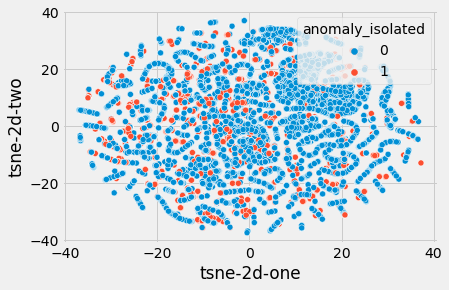

In [141]:
# Scatterplot visualisation 

sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="anomaly_isolated",
    data=updated_df9,
    legend="full",
    alpha=1
)